### refining simplified data classifier
#### using 3 timesteps

In [149]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

In [150]:
planets = pd.read_csv('3ts.csv', skipinitialspace=True)
print(planets.columns)

Index(['run', 'planet', 'initial e', 'final e', 'mean e', 'min e', 'max e',
       'sd e', 'initial pericenter', 'final pericenter', 'mean pericenter',
       'min pericenter', 'max pericenter', 'sd pericenter', 'initial jacobi',
       'final jacobi', 'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi',
       'initial mhr1', 'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1',
       'sd mhr1', 'initial mhr2', 'final mhr2', 'mean mhr2', 'min mhr2',
       'max mhr2', 'sd mhr2', 'initial a1_ratio', 'final a1_ratio',
       'mean a1_ratio', 'min a1_ratio', 'max a1_ratio', 'sd a1_ratio',
       'initial a2_ratio', 'final a2_ratio', 'mean a2_ratio', 'min a2_ratio',
       'max a2_ratio', 'sd a2_ratio', 'initial mass1_ratio',
       'final mass1_ratio', 'mean mass1_ratio', 'min mass1_ratio',
       'max mass1_ratio', 'sd mass1_ratio', 'initial mass2_ratio',
       'final mass2_ratio', 'mean mass2_ratio', 'min mass2_ratio',
       'max mass2_ratio', 'sd mass2_ratio', 'end time', 'fate'],


###### started at ~84% accurate

In [151]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

###### playing around with features to test with

In [ ]:
# OPTION 2

features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

ru = features_test['run'].to_numpy()
p = features_test['planet'].to_numpy()
e = features_test['end time'].to_numpy()
fa = features_test['fate'].to_numpy()

# for graphs
me = features_test['min e'].to_numpy()
fa2 = features_test['final a2_ratio'].to_numpy()
mm2 = features_test['min mass2_ratio'].to_numpy()

d = ['run', 'planet', 'fate', 'end time']

var = ['e','mhr1','mhr2','a1_ratio','a2_ratio','mass1_ratio','mass2_ratio','pericenter','jacobi']

for v in var:
#     d.append('initial ' + str(v))
    d.append('final ' + str(v))
#     d.append('mean ' + str(v))     # getting rid of mean and sd have similar accuracy results
    d.append('min ' + str(v))
#     d.append('max ' + str(v))
#     d.append('sd ' + str(v))
    

ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()

In [ ]:
# OPTION 3

features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

ru = features_test['run'].to_numpy()
p = features_test['planet'].to_numpy()
e = features_test['end time'].to_numpy()
fa = features_test['fate'].to_numpy()

# for graphs
me = features_test['min e'].to_numpy()
fa2 = features_test['final a2_ratio'].to_numpy()
mm2 = features_test['min mass2_ratio'].to_numpy()

d = ['run', 'planet', 'fate', 'end time']

var = ['e','mhr1','mhr2','a1_ratio','a2_ratio']
var2 = ['mass1_ratio','mass2_ratio']
var3 = ['pericenter','jacobi']

for v in var:
#     d.append('initial ' + str(v))
#     d.append('final ' + str(v))
#     d.append('mean ' + str(v))     # getting rid of mean and sd have similar accuracy results
    d.append('min ' + str(v))
    d.append('max ' + str(v))
#     d.append('sd ' + str(v))


for v in var2:
#     d.append('initial ' + str(v))
    d.append('final ' + str(v))
    d.append('mean ' + str(v))     # getting rid of mean and sd have similar accuracy results
    d.append('min ' + str(v))
    d.append('max ' + str(v))
    d.append('sd ' + str(v))

for v in var3:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
#     d.append('mean ' + str(v))
    d.append('min ' + str(v))
    d.append('max ' + str(v))
    d.append('sd ' + str(v))
    

ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()

In [ ]:
# OPTION 4

features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

ru = features_test['run'].to_numpy()
p = features_test['planet'].to_numpy()
e = features_test['end time'].to_numpy()
fa = features_test['fate'].to_numpy()

# for graphs
me = features_test['min e'].to_numpy()
fa2 = features_test['final a2_ratio'].to_numpy()
mm2 = features_test['min mass2_ratio'].to_numpy()

d = ['run', 'planet', 'fate', 'end time']

var = ['e','mhr1','mhr2','a1_ratio','a2_ratio']
var2 = ['mass1_ratio','mass2_ratio']
var3 = ['pericenter','jacobi']

for v in var:
#     d.append('initial ' + str(v))
    d.append('final ' + str(v))
#     d.append('mean ' + str(v))     # getting rid of mean and sd have similar accuracy results
    d.append('min ' + str(v))
    d.append('max ' + str(v))
#     d.append('sd ' + str(v))


for v in var2:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
#     d.append('mean ' + str(v))     # getting rid of mean and sd have similar accuracy results
    d.append('min ' + str(v))
    d.append('max ' + str(v))
    d.append('sd ' + str(v))

for v in var3:
    d.append('initial ' + str(v))
#     d.append('final ' + str(v))
    d.append('mean ' + str(v))
    d.append('min ' + str(v))
    d.append('max ' + str(v))
    d.append('sd ' + str(v))
    

ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()

###### final set of features

In [152]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

ru = features_test['run'].to_numpy()
p = features_test['planet'].to_numpy()
e = features_test['end time'].to_numpy()
fa = features_test['fate'].to_numpy()

# for graphs
me = features_test['min e'].to_numpy()
fa2 = features_test['final a2_ratio'].to_numpy()
mm2 = features_test['min mass2_ratio'].to_numpy()

d = ['run', 'planet', 'fate', 'end time']

var = ['e','mhr1','mhr2','a1_ratio','a2_ratio']
var2 = ['mass1_ratio','mass2_ratio']
var3 = ['pericenter','jacobi']

for v in var:
#     d.append('initial ' + str(v))
    d.append('final ' + str(v))
#     d.append('mean ' + str(v))     # getting rid of mean and sd have similar accuracy results
    d.append('min ' + str(v))
    d.append('max ' + str(v))
#     d.append('sd ' + str(v))


for v in var2:
    d.append('initial ' + str(v))
#     d.append('final ' + str(v))
    d.append('mean ' + str(v))     # getting rid of mean and sd have similar accuracy results
    d.append('min ' + str(v))
    d.append('max ' + str(v))
    d.append('sd ' + str(v))

for v in var3:
    d.append('initial ' + str(v))
    d.append('final ' + str(v))
    d.append('mean ' + str(v))
    d.append('min ' + str(v))
    d.append('max ' + str(v))
    d.append('sd ' + str(v))
    

ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


###### testing, refine hyperparameters (grid search)

In [ ]:
# original, no hyperparameters

classifier = GradientBoostingClassifier(random_state=7)
classifier.fit(features_train, classes_train)

In [ ]:
param_grid = {'learning_rate': [0.05, 0.07, 0.1, 0.12, 0.15],
              'max_depth': [4],
              'n_estimators': [70, 75, 77, 80, 82]
              'max_features': ['auto','sqrt','log2']}  
  
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(features_train, classes_train)

# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(features_train)
  
# print classification report 
print(classification_report(classes_train, grid_predictions)) 

rounds of further refining of hyperparameters (documentation in msef doc)

In [ ]:
# so many rounds


# original tests w/ grid searching
# classifier = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 4, max_features = 'auto', n_estimators = 75, random_state=7)
# classifier.fit(features_train, classes_train)

# classifier = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, max_features = 'log2', n_estimators = 75, random_state=7)
# classifier.fit(features_train, classes_train)

# classifier = GradientBoostingClassifier(learning_rate = 0.12, max_depth = 4, max_features = 'log2', n_estimators = 80, random_state=7)
# classifier.fit(features_train, classes_train)

# classifier = GradientBoostingClassifier(learning_rate = 0.15, max_depth = 4, max_features = 'log2', n_estimators = 83, random_state=7)
# classifier.fit(features_train, classes_train)



# playing around
# classifier = GradientBoostingClassifier(learning_rate = 0.119, max_depth = 4, max_features = 'log2', n_estimators = 70, random_state=7)
# classifier.fit(features_train, classes_train)

# classifier = GradientBoostingClassifier(learning_rate = 0.117, max_depth = 4, max_features = 'log2', n_estimators = 70, random_state=7)
# classifier.fit(features_train, classes_train)

# classifier = GradientBoostingClassifier(learning_rate = 0.12, max_depth = 4, max_features = 'log2', n_estimators = 73, random_state=7)
# classifier.fit(features_train, classes_train)

In [153]:
# final one

classifier = GradientBoostingClassifier(learning_rate = 0.09, max_depth = 4, max_features = 'log2', n_estimators = 79, random_state=7)
classifier.fit(features_train, classes_train)

GradientBoostingClassifier(learning_rate=0.09, max_depth=4, max_features='log2',
                           n_estimators=79, random_state=7)

In [154]:
classes_predict = classifier.predict(features_test)
print('Classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

Classifier is  84.33333333333334 % accurate on testing set




###### feature importances

In [155]:
feats=classifier.feature_importances_
inds=np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

sd e 0.1418063290907015
final mass1_ratio 0.12965128205994247
final mass2_ratio 0.12929311758360074
initial a2_ratio 0.12392121692707903
initial mhr1 0.05572202890218646
sd a2_ratio 0.05470234632786677
mean a2_ratio 0.05219895932934112
initial mhr2 0.049743957272050686
mean mhr2 0.037745479072041635
sd mhr1 0.03519571520876218
mean e 0.03372135264994199
initial a1_ratio 0.030194636549393954
sd mhr2 0.02759135196858245
sd a1_ratio 0.026136431457197042
initial e 0.02535999805901628
mean a1_ratio 0.024182990828265964
mean mhr1 0.022832806714029652


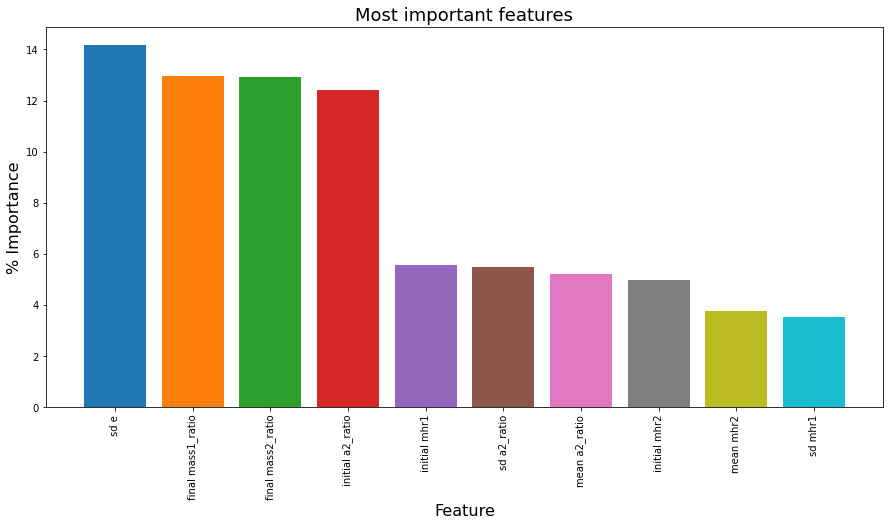

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

f=plt.figure(figsize=(15,7))

for i in range(0,10):
    plt.bar(cols[inds[i]], feats[inds[i]] * 100)

    
plt.ylabel('% Importance', size=16)
plt.xlabel('Feature', size=16)
plt.title('Most important features', size=18)
plt.xticks(rotation = 90)
plt.show()

###### playing around with important features - correctly classified vs misclassified planets

1. Maybe revisit the data generation step to try to find the two dynamically closest planets instead of the inner and outer planets in your data set? 
2. Begin to explore the misclassified objects:
    - What are the instability times for misclassified planets?
    - Does the evolution of misclassified planets look different (e.g., does something like a vs. time or e vs. time give us any insight?)
    - (For instance, I might guess that most of the misclassified planets are truly unstable but classified as stable and have long instability times)
3. Look at the probabilities of class membership (how sure are we that planets are stable or unstable)
    - You can use the classifier method predict_proba (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier.predict_proba)
    - Do the misclassified objects have high or low probabilities?
    - How many of the correctly classified objects have high probability? (more than 90%? 95%? 99.9%?)
    - What is probability as a function of instability time for the unstable planets?

Text(0.5, 1.0, 'sd e vs mass1')

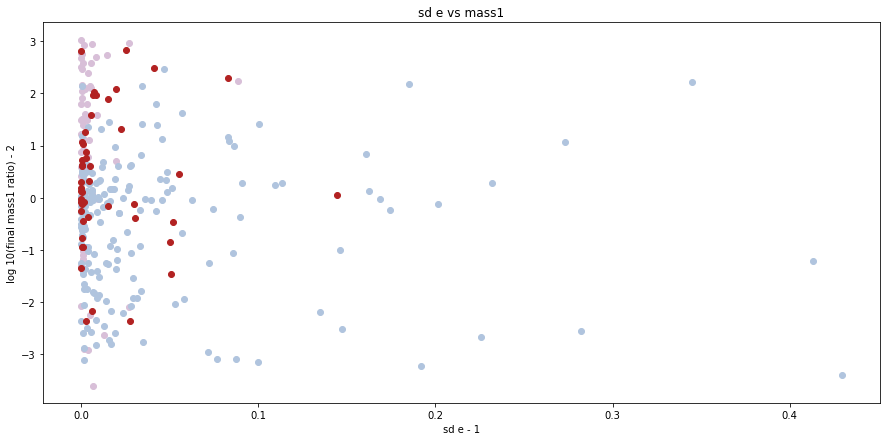

In [157]:
stable_x = []
unstable_x = []
misclassified_x = []
stable_y = []
unstable_y = []
misclassified_y = []
    
    
f=plt.figure(figsize=(15,7))

for i in range(len(features_test)):
    if (classes_test[i] == 0 and classes_predict[i] == 0):
        stable_x.append(features_test[i][2])
        stable_y.append(features_test[i][16])
    elif (classes_test[i] == 1 and classes_predict[i] == 1):
        unstable_x.append(features_test[i][2])
        unstable_y.append(features_test[i][16])
    else:
        misclassified_x.append(features_test[i][2])
        misclassified_y.append(features_test[i][16])

        
# plt.scatter(stable_x, stable_y, color = 'thistle')
# plt.scatter(misclassified_x, misclassified_y, color = 'firebrick', zorder = 2)
# plt.scatter(unstable_x, unstable_y, color = 'lightsteelblue')

plt.scatter(stable_x, np.log10(stable_y), color = 'thistle')
plt.scatter(misclassified_x, np.log10(misclassified_y), color = 'firebrick', zorder = 2)
plt.scatter(unstable_x, np.log10(unstable_y), color = 'lightsteelblue')

plt.ylabel('log 10(final mass1 ratio) - 2')
plt.xlabel('sd e - 1')
plt.title('sd e vs mass1')

(0.0, 0.4)

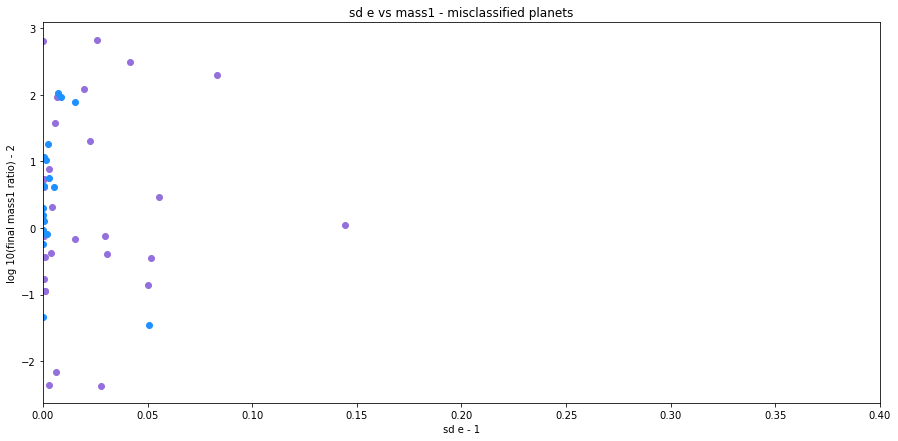

In [130]:
sx = []
sy = []
ux = []
uy = []

f=plt.figure(figsize=(15,7))

for i in range(len(features_test)):
    if (classes_test[i] != classes_predict[i]):
        if (classes_test[i] == 0):
            sx.append(features_test[i][2])
            sy.append(features_test[i][16])
        else:
            ux.append(features_test[i][2])
            uy.append(features_test[i][16])

        
plt.scatter(sx, np.log10(sy), color = 'mediumpurple')
plt.scatter(ux, np.log10(uy), color = 'dodgerblue')

plt.ylabel('log 10(final mass1 ratio) - 2')
plt.xlabel('sd e - 1')
plt.title('sd e vs mass1 - misclassified planets')
plt.xlim(0,0.4)

(0.0, 0.4)

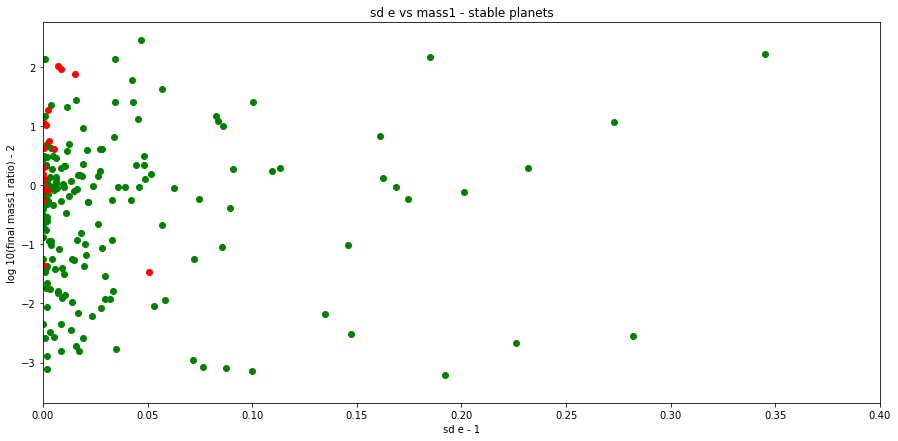

In [140]:
cx = []
cy = []
wx = []
wy = []

f=plt.figure(figsize=(15,7))    
            
# for i in range(len(features_test)):
#     if (classes_test[i] == 0):
#         if (classes_predict[i] == 0):
#             cx.append(features_test[i][2])
#             cy.append(features_test[i][16])
#         else:
#             wx.append(features_test[i][2])
#             wy.append(features_test[i][16])
            

for i in range(len(features_test)):
    if (classes_test[i] == 1):
        if (classes_predict[i] == 1):
            cx.append(features_test[i][2])
            cy.append(features_test[i][16])
        else:
            wx.append(features_test[i][2])
            wy.append(features_test[i][16])

        
plt.scatter(cx, np.log10(cy), color = 'green')
plt.scatter(wx, np.log10(wy), color = 'red')
        

plt.ylabel('log 10(final mass1 ratio) - 2')
plt.xlabel('sd e - 1')
plt.title('sd e vs mass1 - stable planets')
plt.xlim(0,0.4)

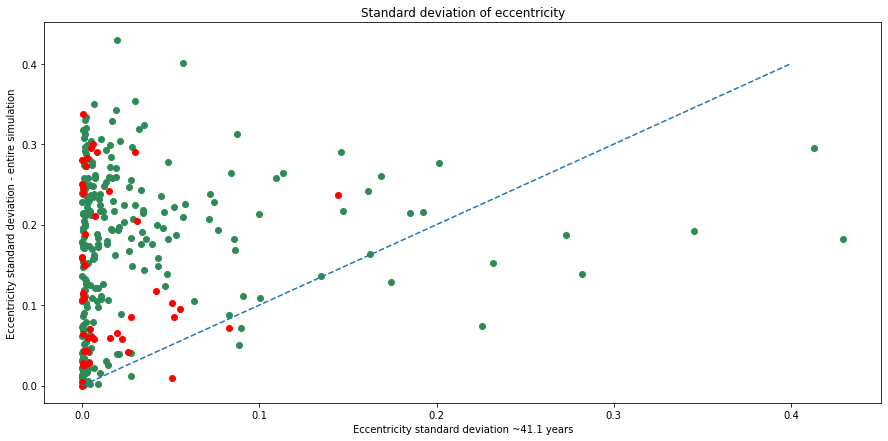

In [166]:
f=plt.figure(figsize=(15,7))
r = classifier.predict_proba(features_test)

for i in range(len(classes_test)):
    if(classes_test[i] == classes_predict[i]):
        plt.scatter(features_test[i][2], np.std(data[ru[i]][p[i]]['e']), color = 'seagreen')
    else:
        plt.scatter(features_test[i][2], np.std(data[ru[i]][p[i]]['e']), color = 'red', zorder = 2)

plt.plot([0,0.4], [0,0.4], '--')        
plt.ylabel('Eccentricity standard deviation - entire simulation')
plt.xlabel('Eccentricity standard deviation ~41.1 years')
plt.title('Standard deviation of eccentricity')
plt.show()

###### interesting factors as function of time

In [63]:
# load in data... again :(

import pandas as pd
import numpy as np
import csv


data = dict()

cols = ['Time','mass','a','e','i','omega','Omega','M','dist_jac','dist_cen','x','y','z','u','v','w']

for rn in range(1,101):
    data[rn] = dict()
    for planetnum in range(1,11):
        data[rn][planetnum] = dict()
        pl = pd.read_csv(r'/Users/neha/Documents/lanl/classifier/run'+str(rn)+'/PL'+str(planetnum)+'.el', skiprows=2, delimiter=r"\s+", names=cols) 
        
        for col in cols:
            data[rn][planetnum][col] = dict()
            try:
                data[rn][planetnum][col] = pl[col]
            except:
                 pass

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

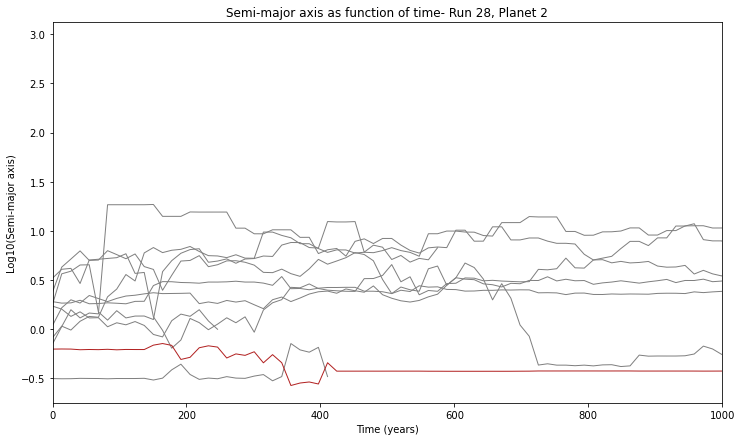

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

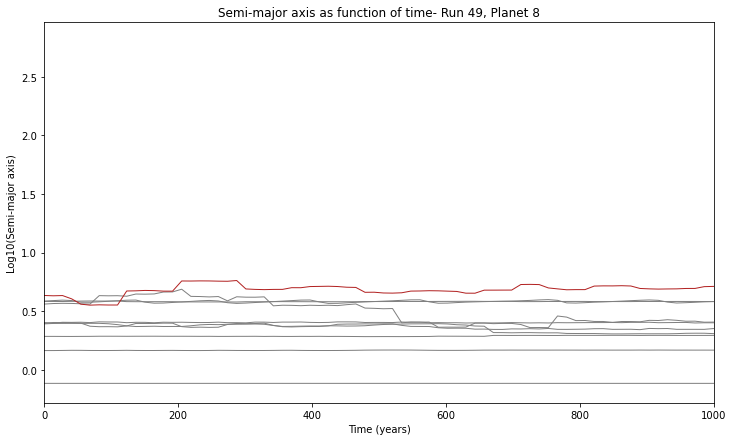

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

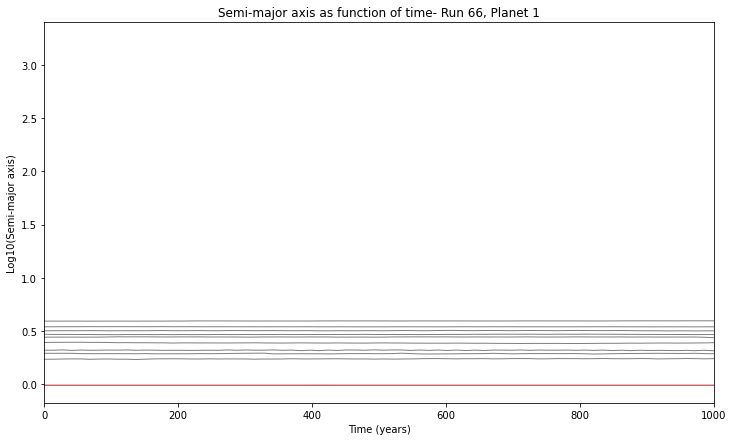

<ipython-input-90-c790e60b599c>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(12,7))
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid val

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

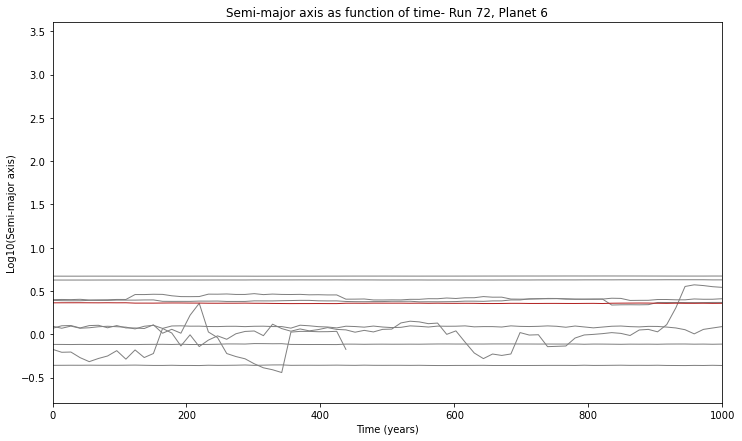

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

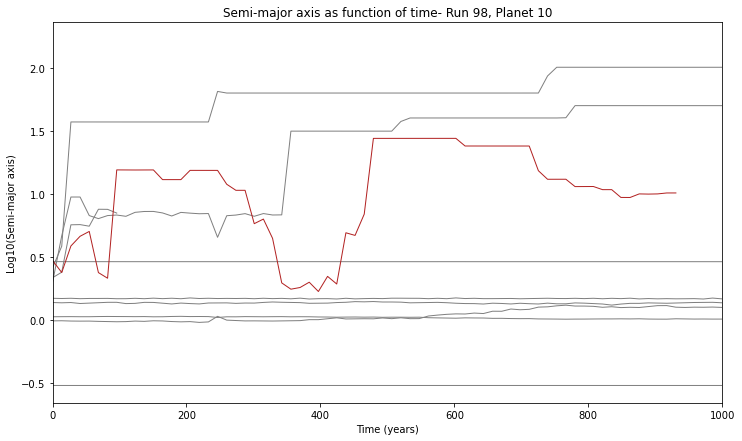

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

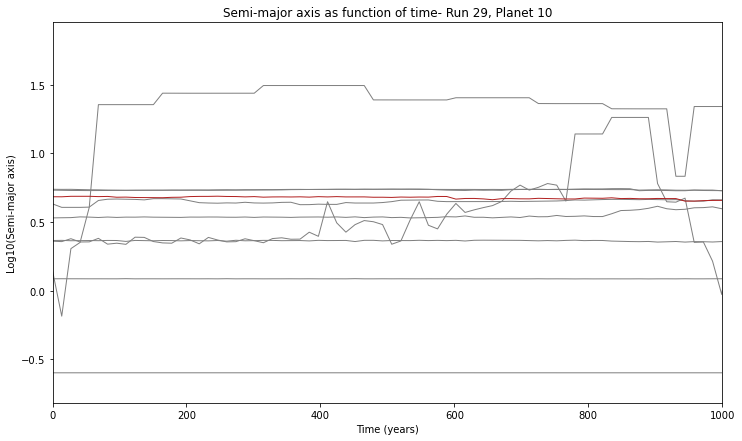

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

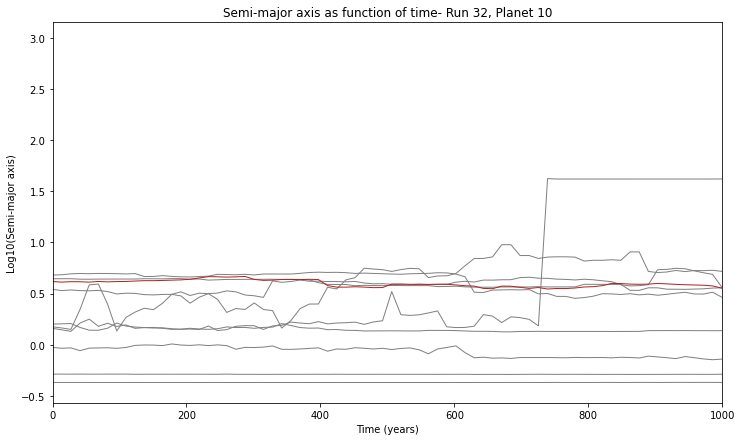

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

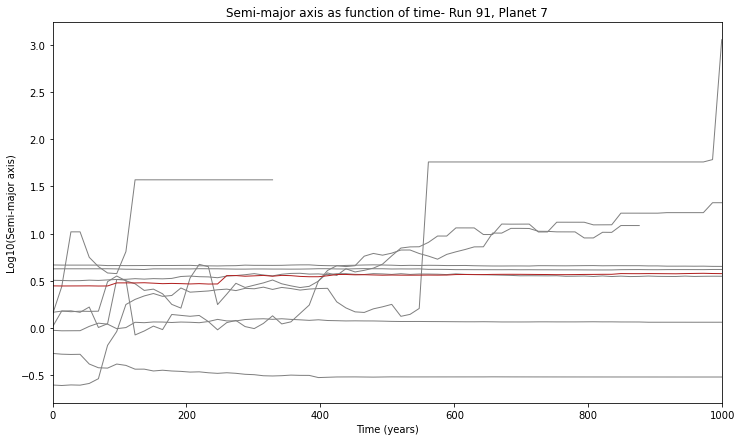

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

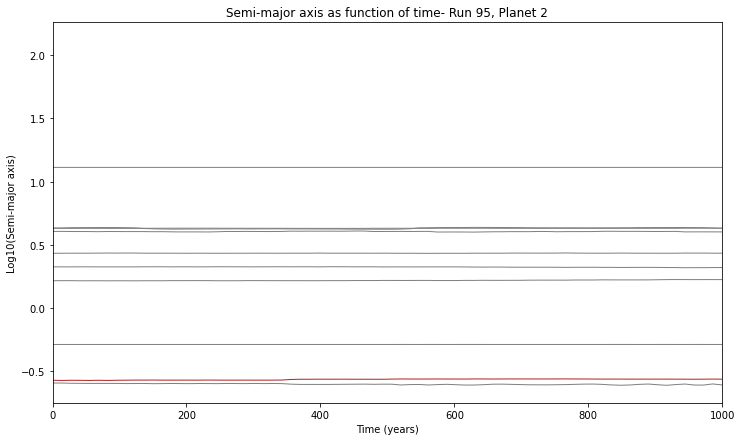

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

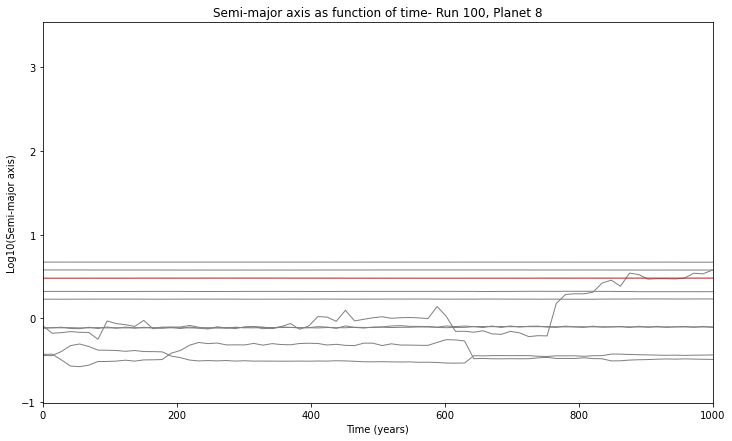

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

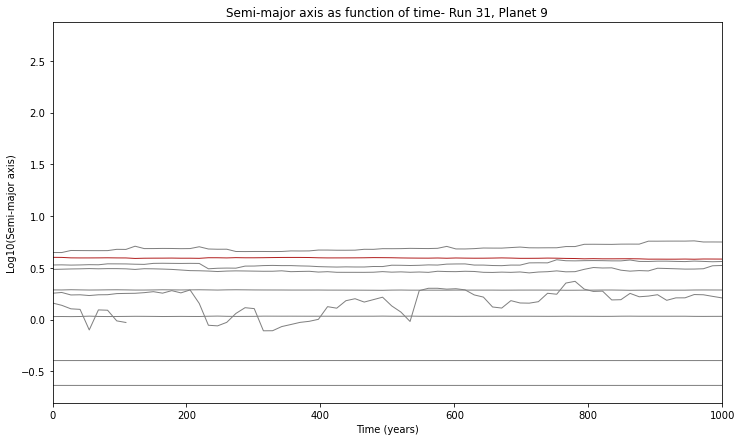

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

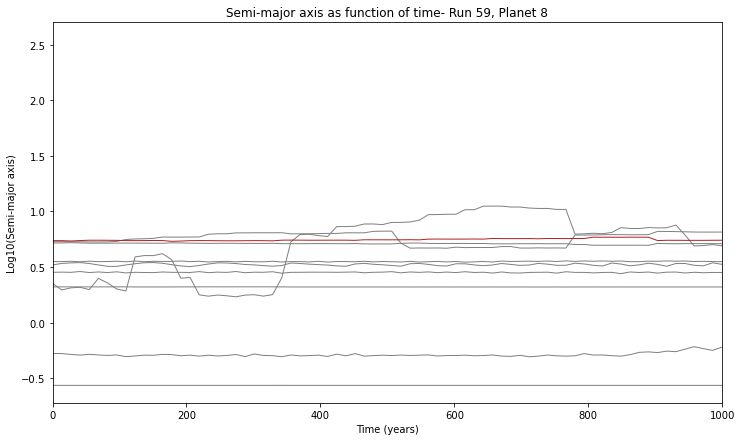

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

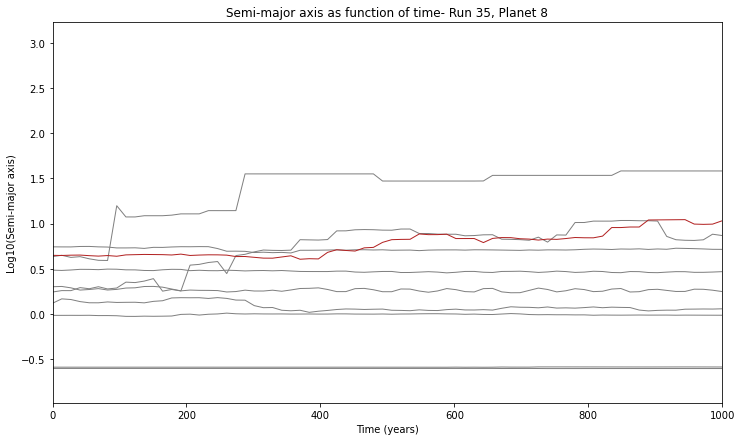

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

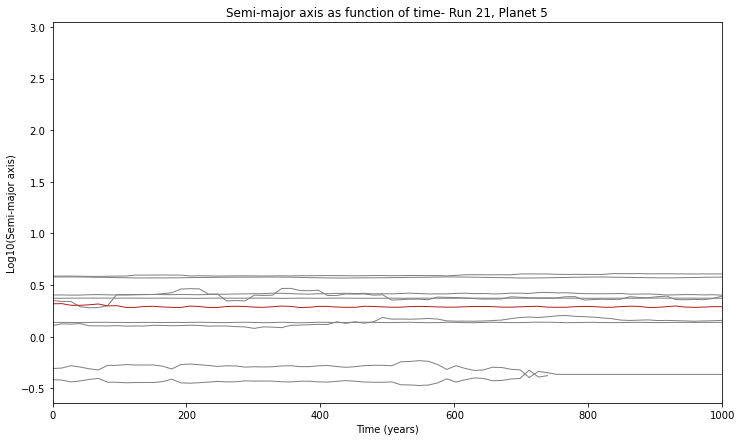

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

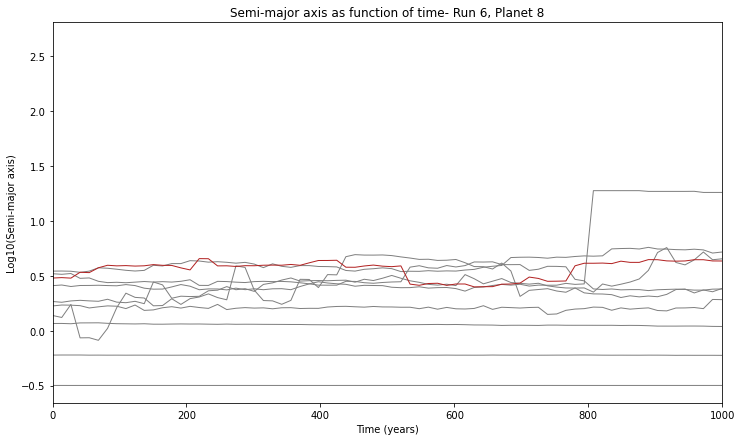

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

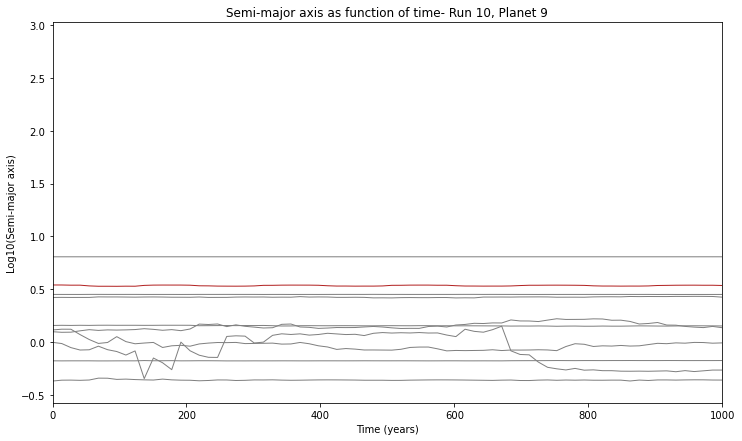

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

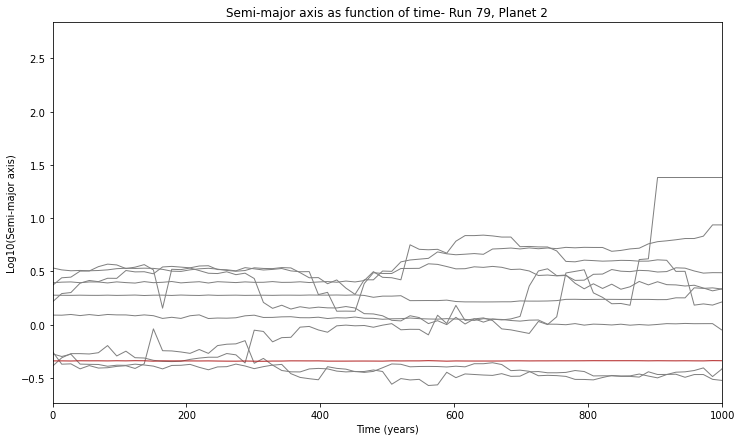

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

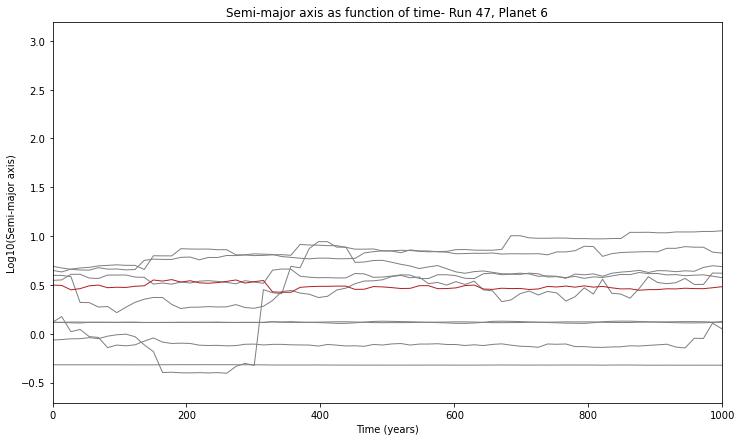

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

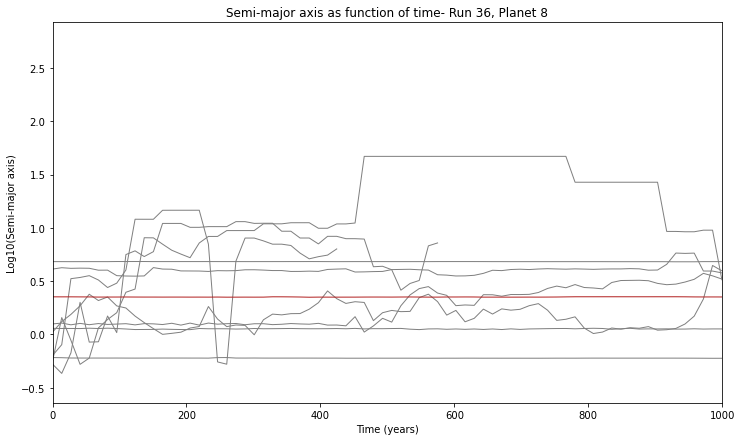

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

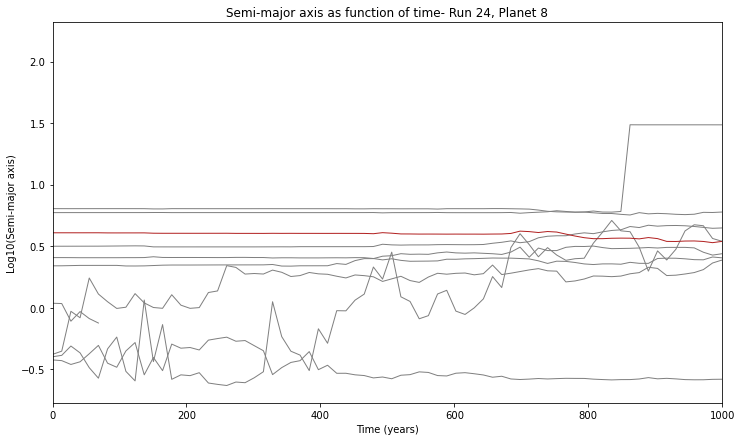

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


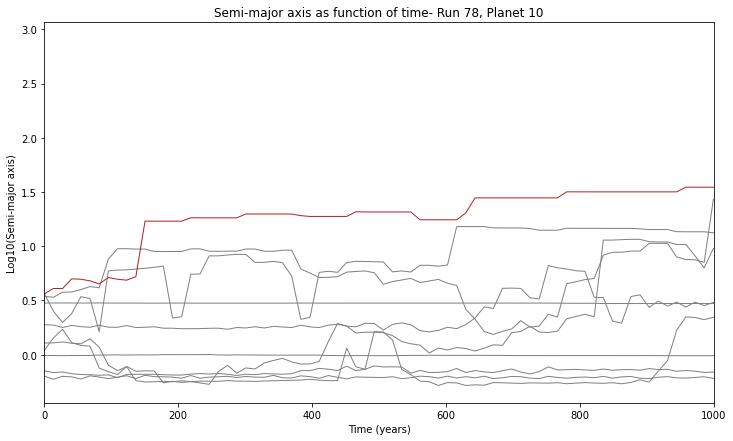

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

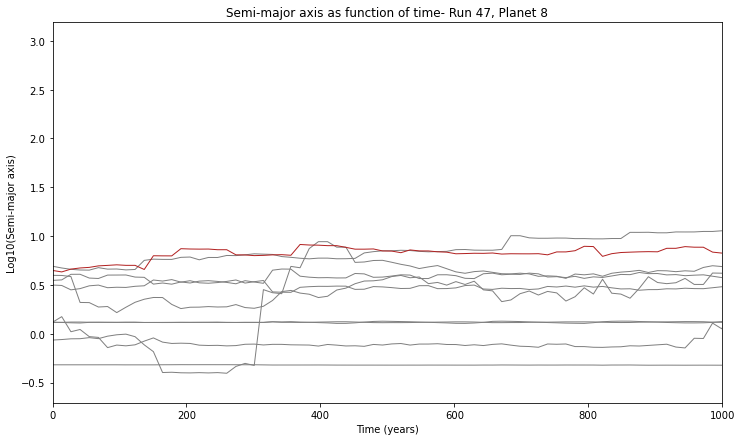

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

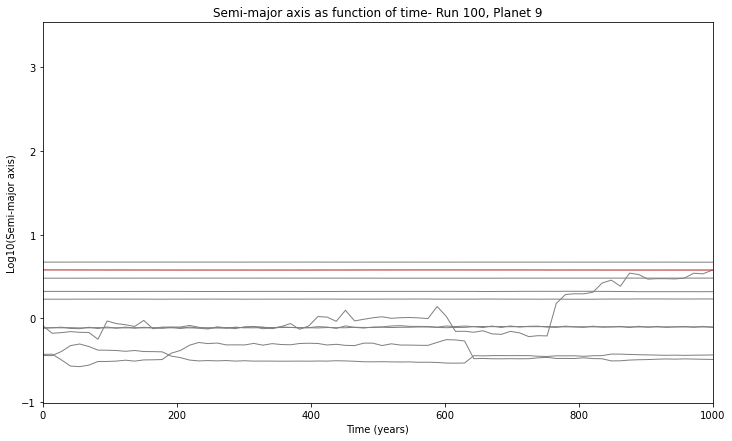

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

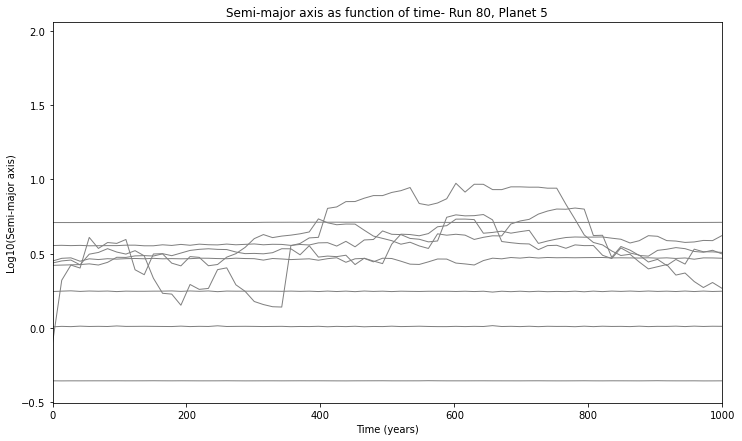

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

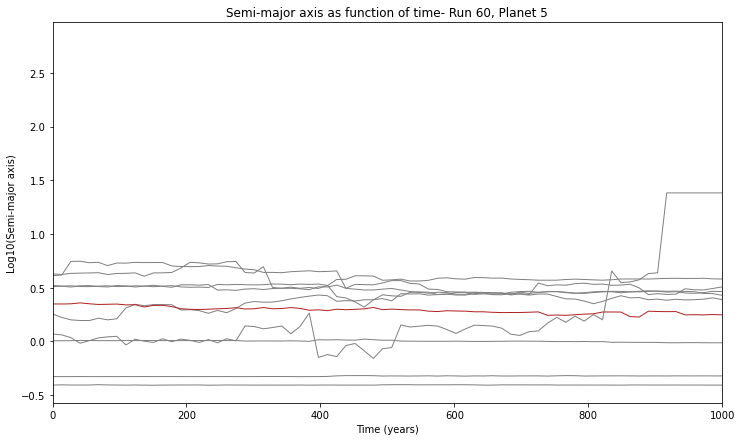

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

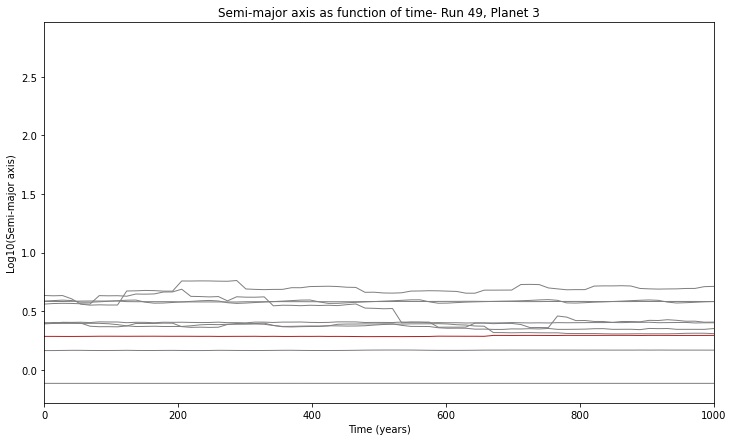

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

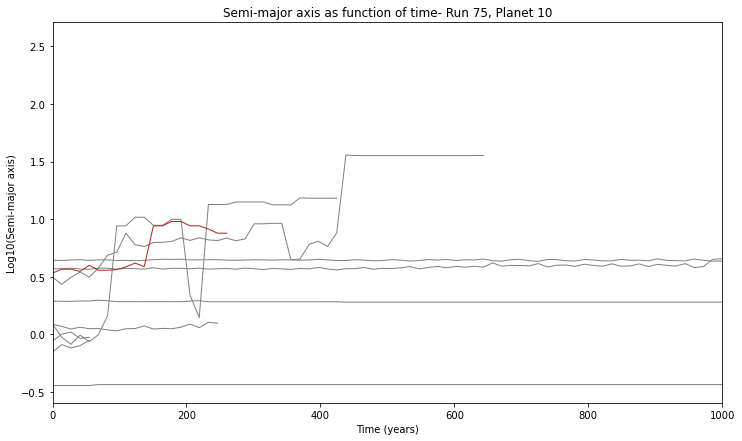

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

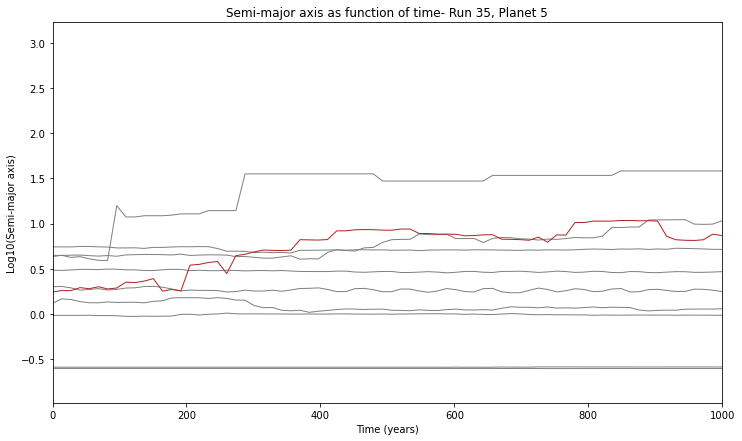

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

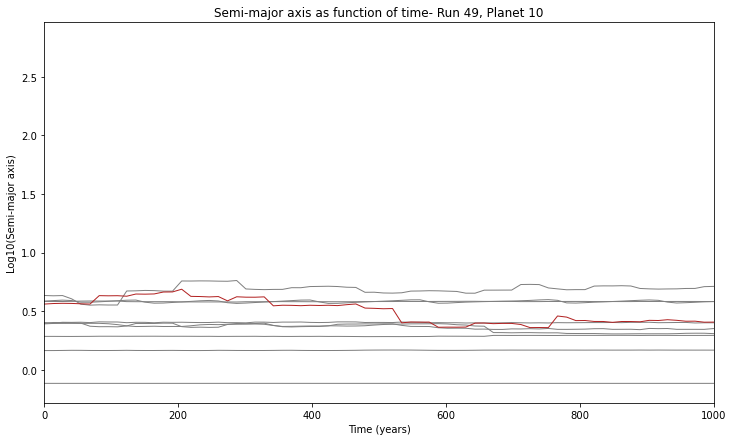

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

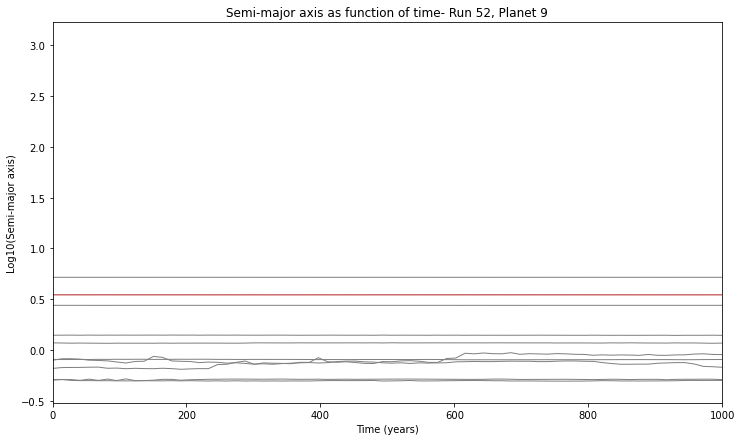

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

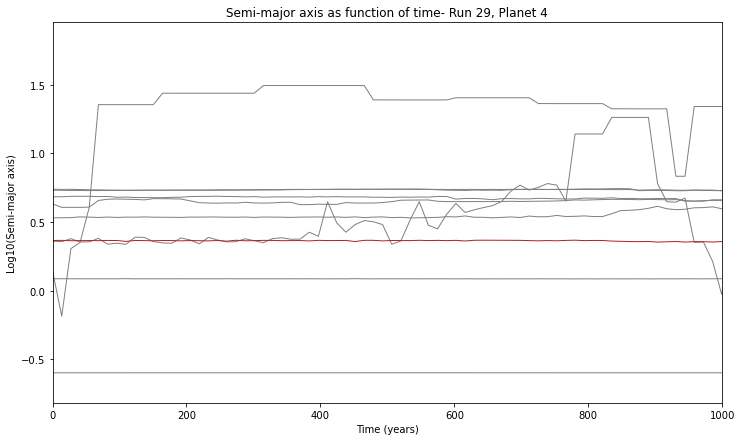

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

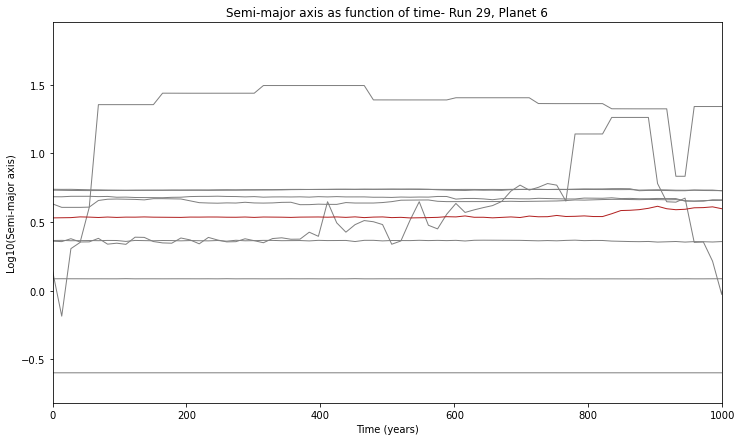

<ipython-input-90-c790e60b599c>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(12,7))
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

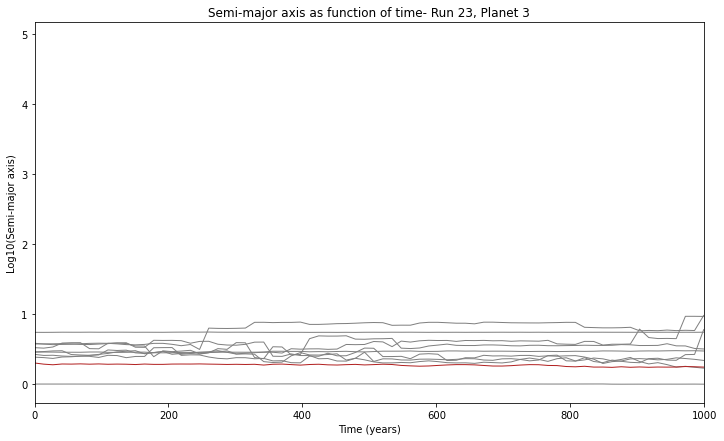

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

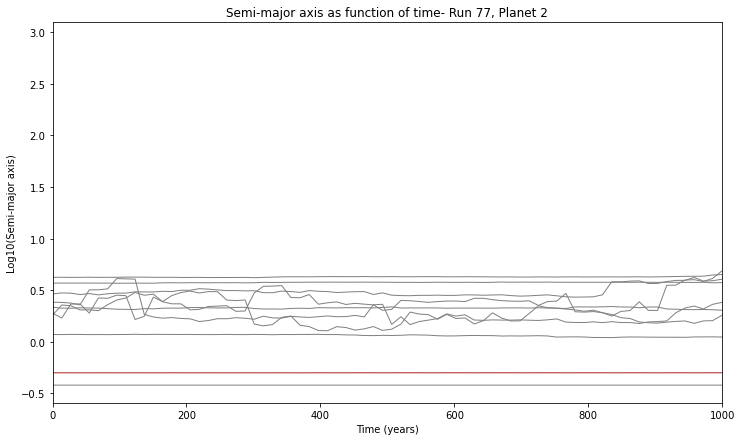

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

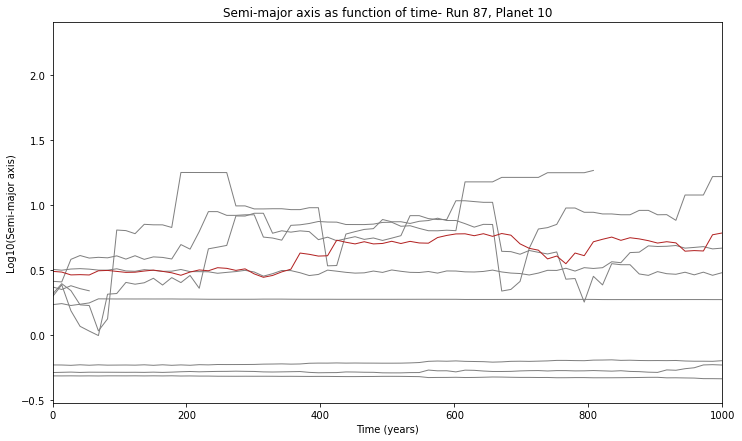

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


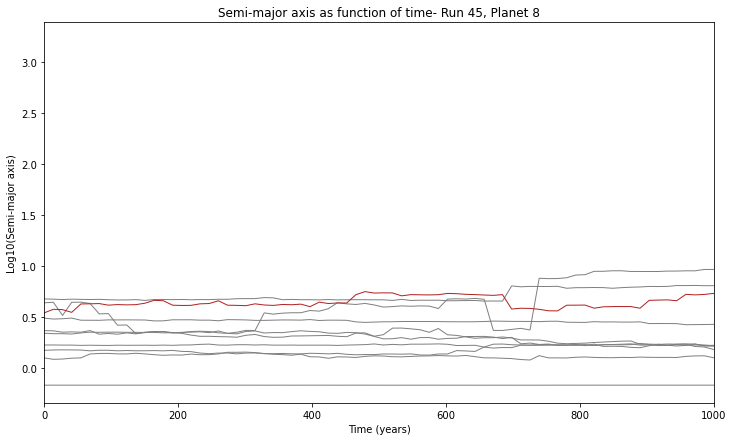

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

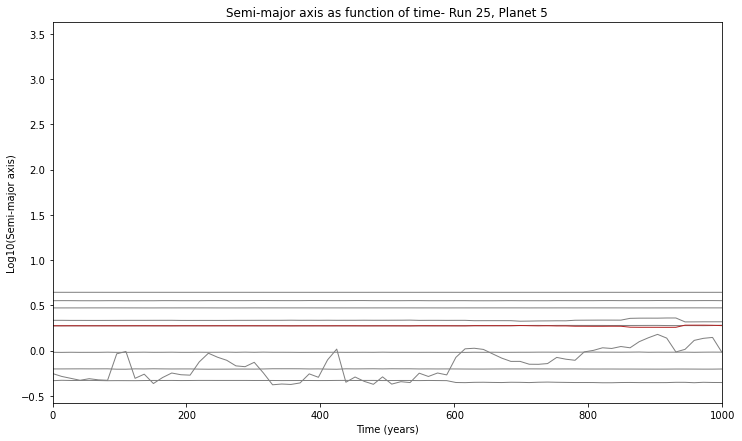

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

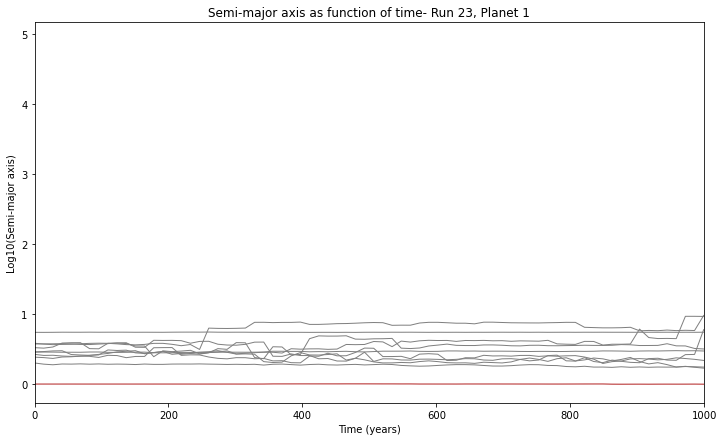

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

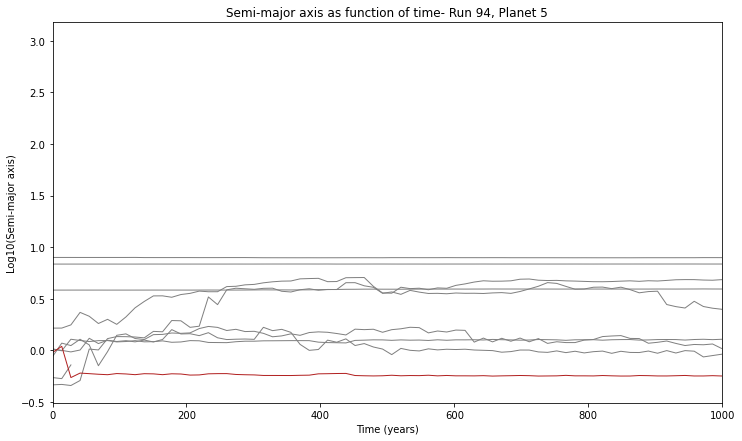

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


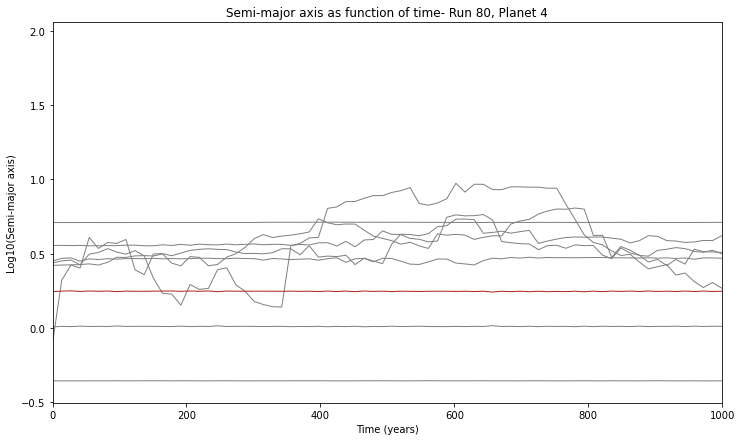

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

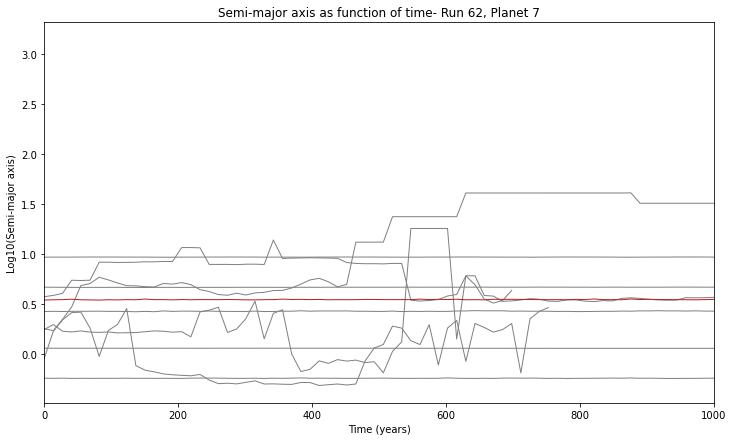

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

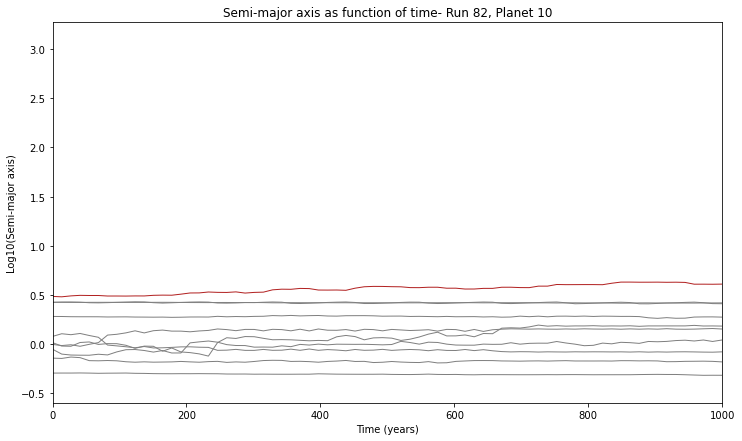

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

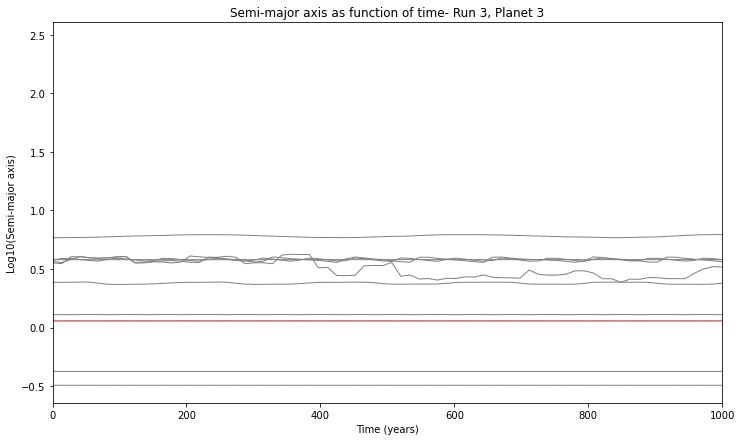

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


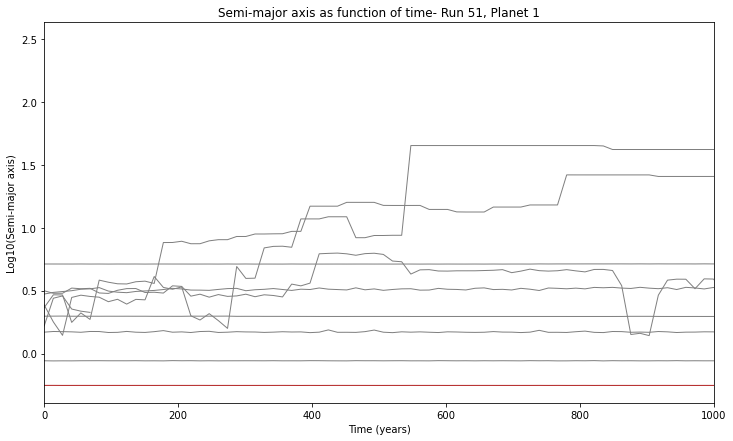

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

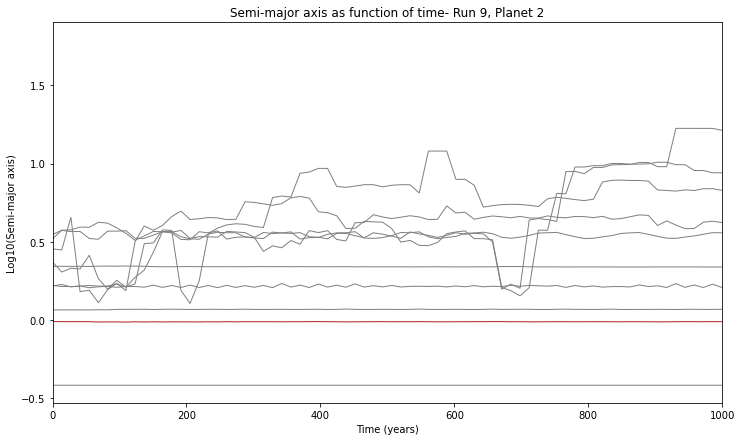

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py

<Figure size 864x504 with 0 Axes>

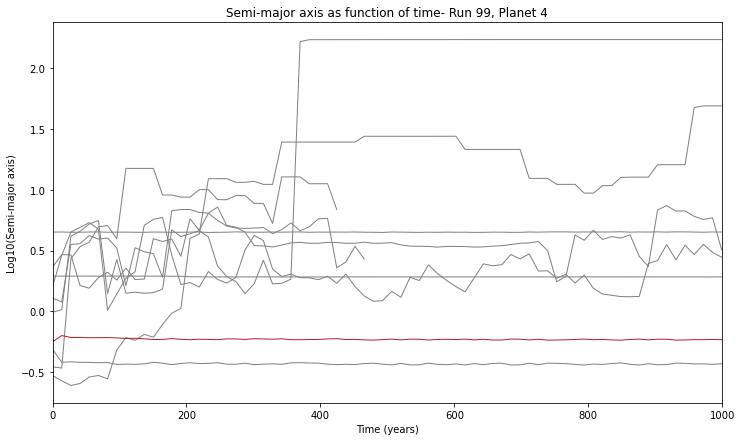

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

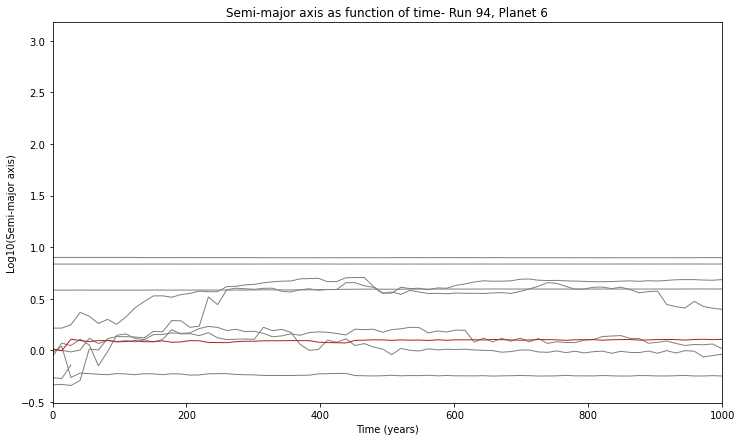

<ipython-input-90-c790e60b599c>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(12,7))


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

In [90]:
r = classifier.predict_proba(features_test)
    
for i in range(len(classes_test)):
    f = plt.figure(figsize=(12,7))
    
    if (classes_test[i] != classes_predict[i]):
        for pl in range(1, 11):
            if pl == p[i]:
                pass
            else:
                plt.plot(data[ru[i]][pl]['Time'], np.log10(data[ru[i]][pl]['a']), linewidth = 1, color = 'gray')
        
        plt.plot(data[ru[i]][p[i]]['Time'], np.log10(data[ru[i]][p[i]]['a']), linewidth = 1, color = 'firebrick')    
        
        plt.ylabel('Log10(Semi-major axis)')
        plt.xlabel('Time (years)')
        plt.title('Semi-major axis as function of time- Run ' + str(ru[i]) + ', Planet ' + str(p[i]))
        plt.xlim(0, 1000)
        plt.show()

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

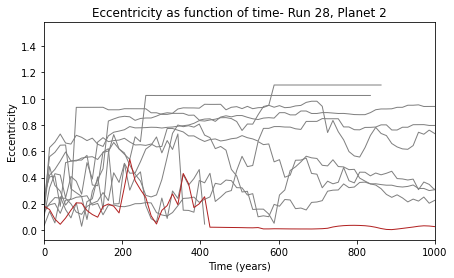

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

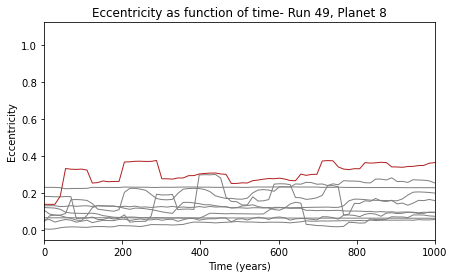

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

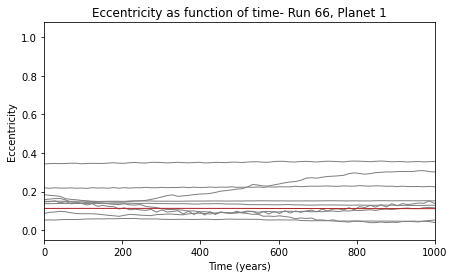

<ipython-input-89-c50df8332110>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(7,4))


<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

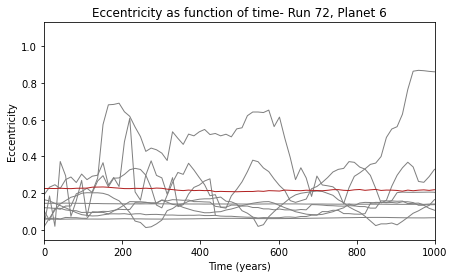

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

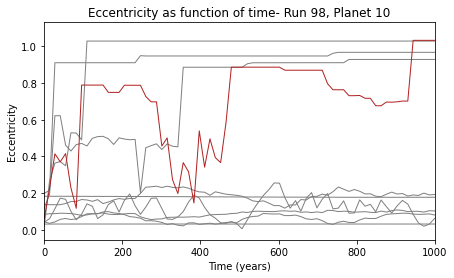

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

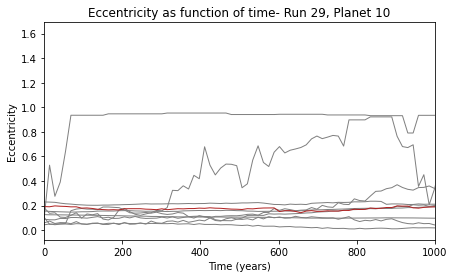

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

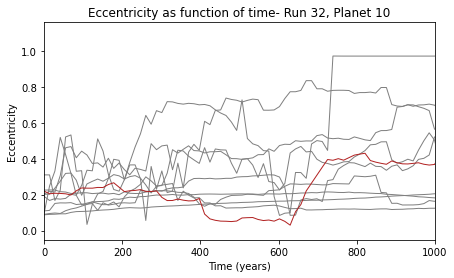

<Figure size 504x288 with 0 Axes>

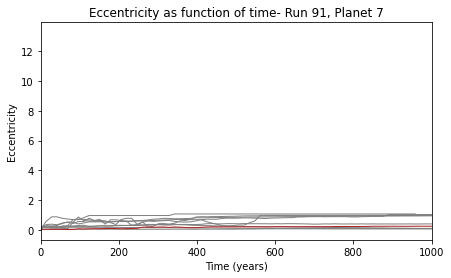

<Figure size 504x288 with 0 Axes>

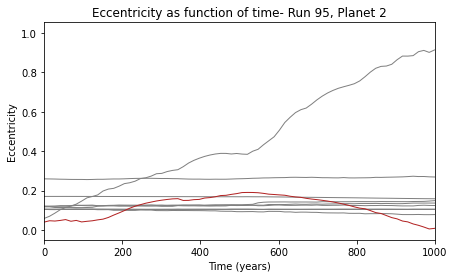

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

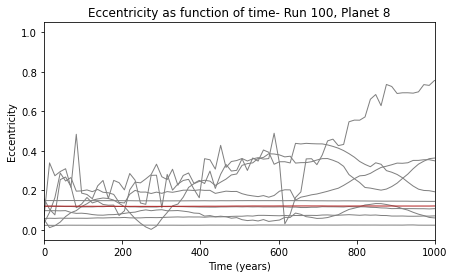

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

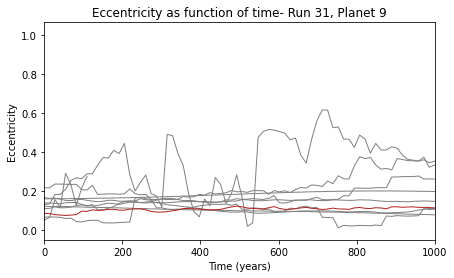

<Figure size 504x288 with 0 Axes>

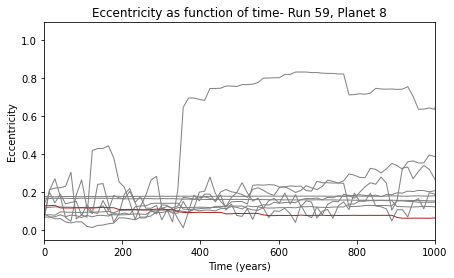

<Figure size 504x288 with 0 Axes>

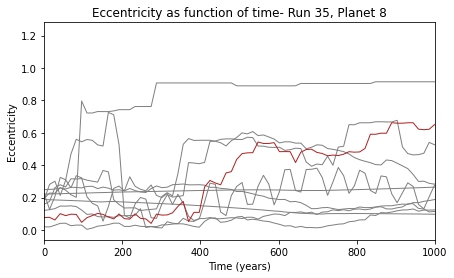

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

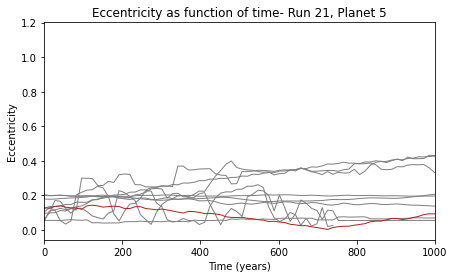

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

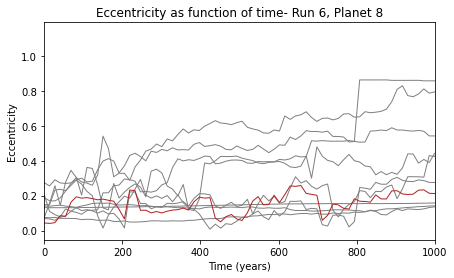

<Figure size 504x288 with 0 Axes>

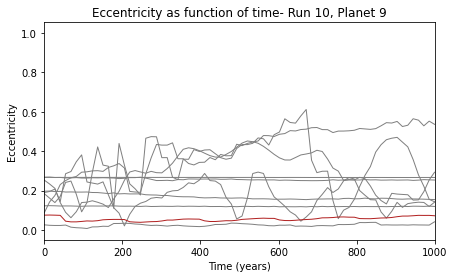

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

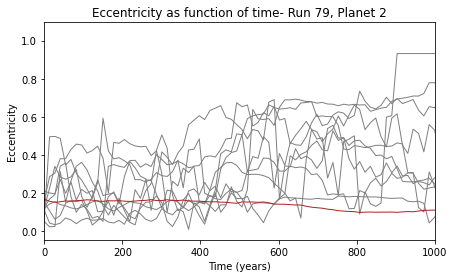

<Figure size 504x288 with 0 Axes>

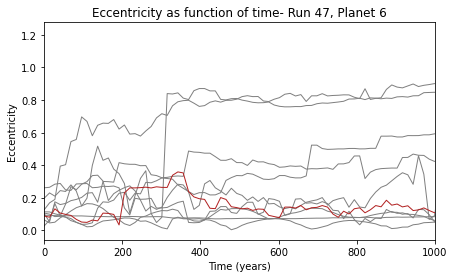

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

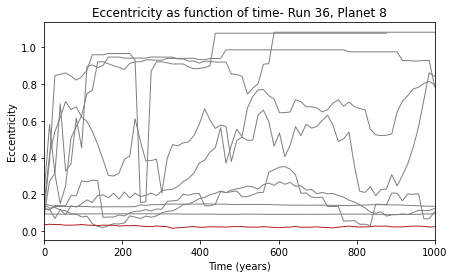

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

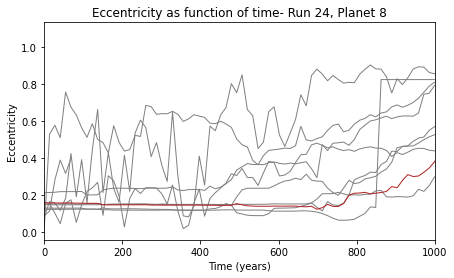

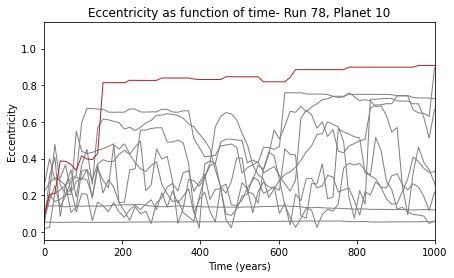

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

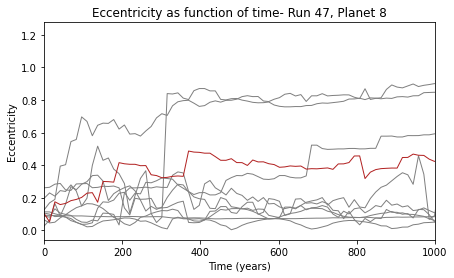

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

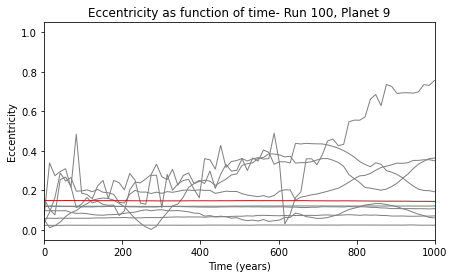

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

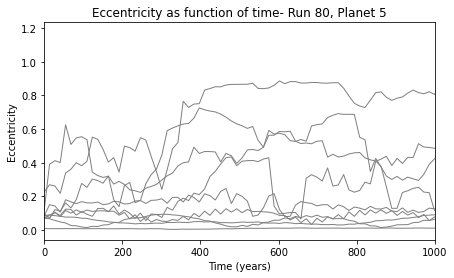

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

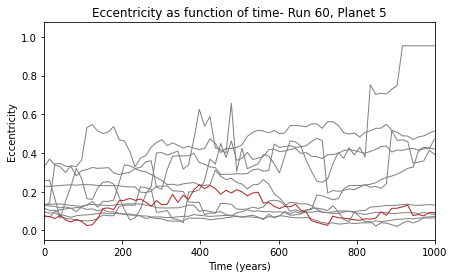

<Figure size 504x288 with 0 Axes>

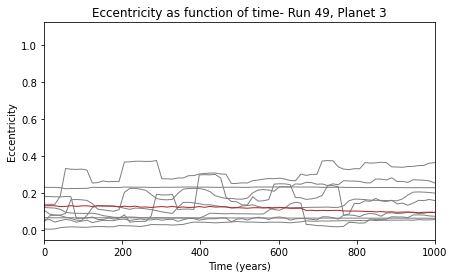

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

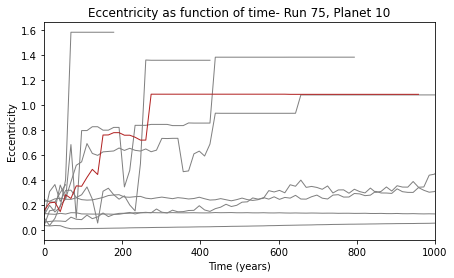

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

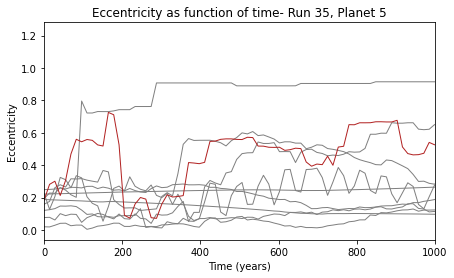

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

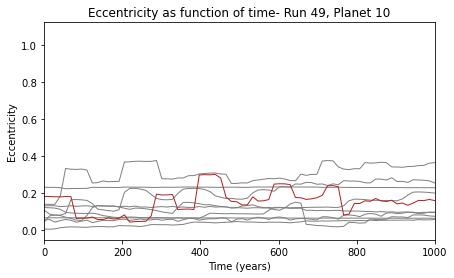

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

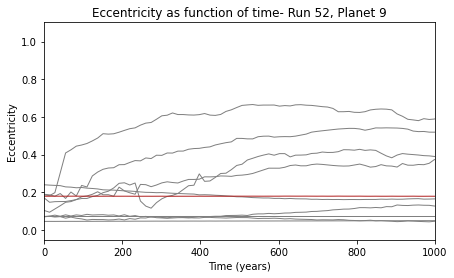

<Figure size 504x288 with 0 Axes>

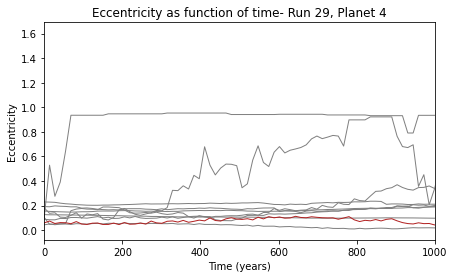

<Figure size 504x288 with 0 Axes>

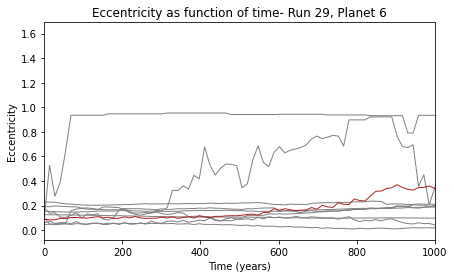

<ipython-input-89-c50df8332110>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(7,4))


<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

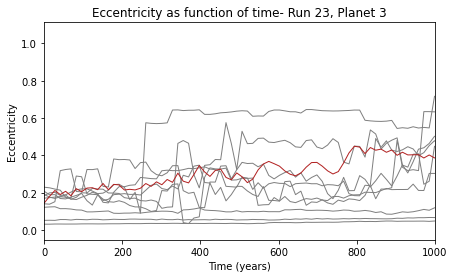

<Figure size 504x288 with 0 Axes>

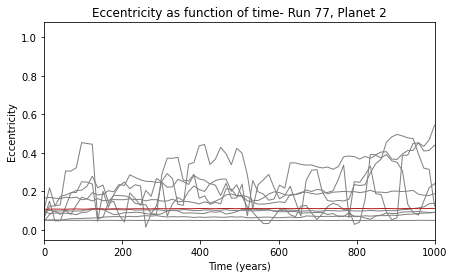

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

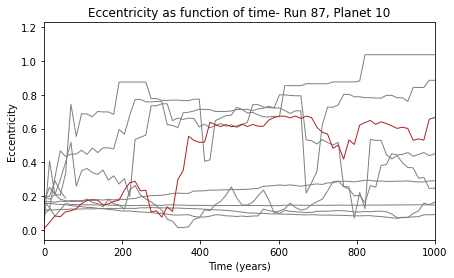

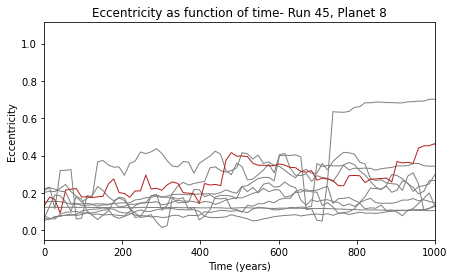

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

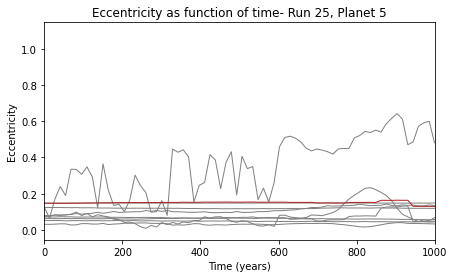

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

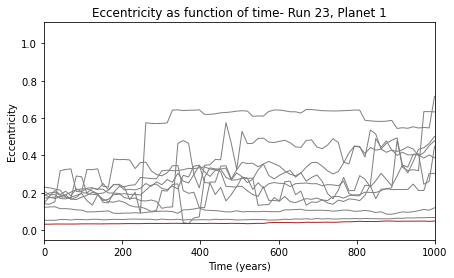

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

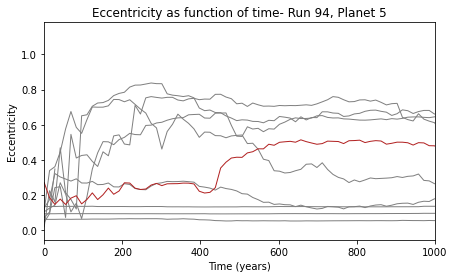

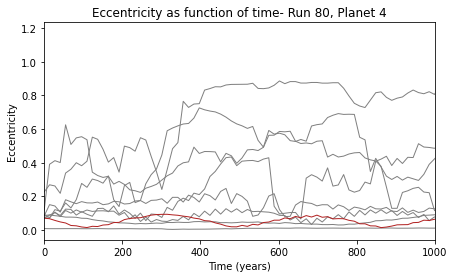

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

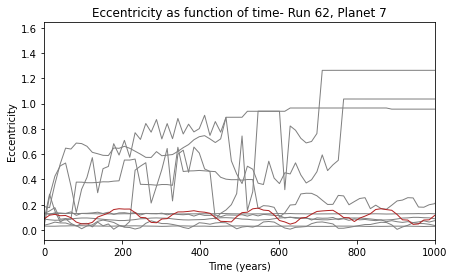

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

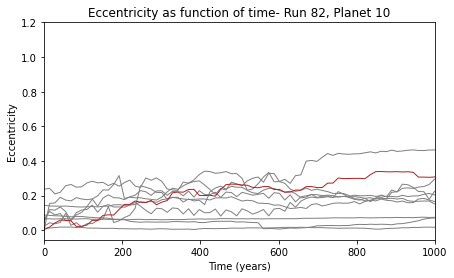

<Figure size 504x288 with 0 Axes>

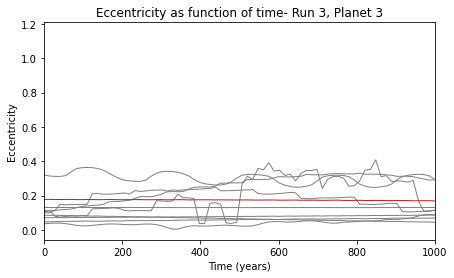

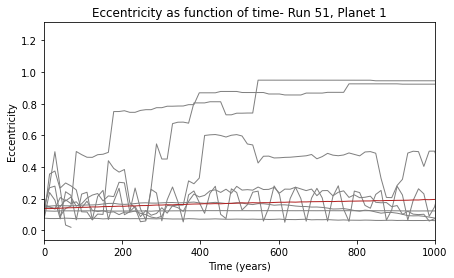

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

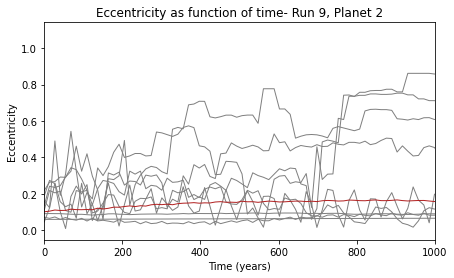

<Figure size 504x288 with 0 Axes>

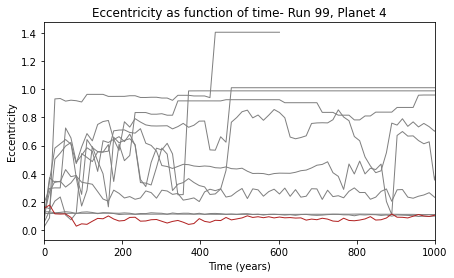

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

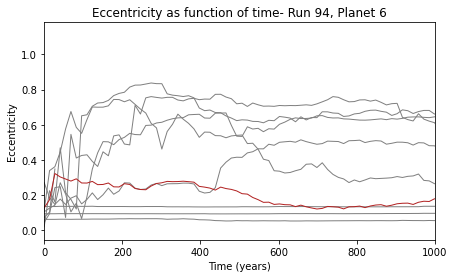

<ipython-input-89-c50df8332110>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(7,4))


<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [89]:
r = classifier.predict_proba(features_test)
    
for i in range(len(classes_test)):
    f = plt.figure(figsize=(7,4))
    
    if (classes_test[i] != classes_predict[i]):
        for pl in range(1, 11):
            if pl == p[i]:
                pass
            else:
                plt.plot(data[ru[i]][pl]['Time'], data[ru[i]][pl]['e'], linewidth = 1, color = 'gray')
        
        plt.plot(data[ru[i]][p[i]]['Time'], data[ru[i]][p[i]]['e'], linewidth = 1, color = 'firebrick')    
        
        plt.ylabel('Eccentricity')
        plt.xlabel('Time (years)')
        plt.title('Eccentricity as function of time- Run ' + str(ru[i]) + ', Planet ' + str(p[i]))
        plt.xlim(0, 1000)
        plt.show()

###### probability - stable/unstable

In [53]:
# distribution of probabilities - correct classification

r = classifier.predict_proba(features_test) 
n = 0
n80 = 0
n90 = 0
n95 = 0
n99 = 0

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        n += 1
        if (classes_test[i] == 0):
            if ((r[i][0] * 100) > 80):
                n80 += 1
                if ((r[i][0] * 100) > 90):
                    n90 += 1
                    if ((r[i][0] * 100) > 95):
                        n95 += 1
                        if ((r[i][0] * 100) > 99):
                                n99 += 1
            
        else:
            if ((r[i][1] * 100) > 80):
                n80 += 1
                if ((r[i][1] * 100) > 90):
                    n90 += 1
                    if ((r[i][1] * 100) > 95):
                        n95 += 1
                        if ((r[i][1] * 100) > 99):
                            n99 += 1

print('Sample size: ' + str(len(r)))
print('\nNumber of correctly classified planets: ' + str(n))
print('\nCorrectly classified planets with probability >80%: ' + str(n80) + ', Percent: ' + str(n80/n * 100))
print('\nCorrectly classified planets with probability >90%: ' + str(n90) + ', Percent: ' + str(n90/n * 100))
print('\nCorrectly classified planets with probability >95%: ' + str(n95) + ', Percent: ' + str(n95/n * 100))
print('\nCorrectly classified planets with probability >99%: ' + str(n99) + ', Percent: ' + str(n99/n * 100))

Sample size: 300

Number of correctly classified planets: 253

Correctly classified planets with probability >80%: 206, Percent: 81.42292490118577

Correctly classified planets with probability >90%: 165, Percent: 65.21739130434783

Correctly classified planets with probability >95%: 107, Percent: 42.29249011857708

Correctly classified planets with probability >99%: 1, Percent: 0.3952569169960474


In [54]:
# distribution of probabilities - misclassified

r = classifier.predict_proba(features_test) 
n = 0
n60 = 0
n75 = 0
n80 = 0
n90 = 0
n95 = 0
n99 = 0

for i in range(0,len(r)):
    if (classes_test[i] != classes_predict[i]):
        n += 1
        if (classes_test[i] == 0):   # acc stable, pred unst
            if (r[i][1] * 100) < 60:
                n60 += 1
            elif ((r[i][1] * 100) > 75):
                n75 += 1
                if ((r[i][1] * 100) > 80):
                    n80 += 1
                    if ((r[i][1] * 100) > 90):
                        n90 += 1
                        if ((r[i][1] * 100) > 95):
                            n95 += 1
                            if ((r[i][1] * 100) > 99):
                                    n99 += 1
            
        else:
            if (r[i][0] * 100) < 60:
                n60 += 1
            elif ((r[i][0] * 100) > 75):
                n75 += 1
                if ((r[i][0] * 100) > 80):
                    n80 += 1
                    if ((r[i][0] * 100) > 90):
                        n90 += 1
                        if ((r[i][0] * 100) > 95):
                            n95 += 1
                            if ((r[i][0] * 100) > 99):
                                n99 += 1

                                
print('Sample size: ' + str(len(r)))
print('\nNumber of misclassified planets: ' + str(n))
print('\nCorrectly classified planets with probability <60%: ' + str(n60) + ', Percent: ' + str(n60/n * 100))
print('\nMisclassified planets with probability >75%: ' + str(n75) + ', Percent: ' + str(n75/n * 100))
print('\nMisclassified planets with probability >80%: ' + str(n80) + ', Percent: ' + str(n80/n * 100))
print('\nMisclassified planets with probability >90%: ' + str(n90) + ', Percent: ' + str(n90/n * 100))
print('\nMisclassified planets with probability >95%: ' + str(n95) + ', Percent: ' + str(n95/n * 100))
print('\nMisclassified planets with probability >99%: ' + str(n99) + ', Percent: ' + str(n99/n * 100))

Sample size: 300

Number of misclassified planets: 47

Correctly classified planets with probability <60%: 10, Percent: 21.27659574468085

Misclassified planets with probability >75%: 25, Percent: 53.191489361702125

Misclassified planets with probability >80%: 21, Percent: 44.680851063829785

Misclassified planets with probability >90%: 14, Percent: 29.78723404255319

Misclassified planets with probability >95%: 7, Percent: 14.893617021276595

Misclassified planets with probability >99%: 0, Percent: 0.0


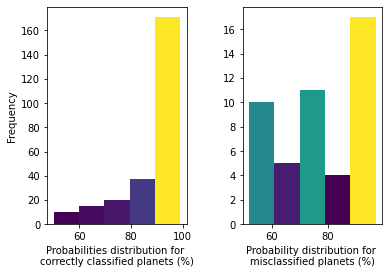

In [101]:
# histogram

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

fig, (ax1, ax2) = plt.subplots(1, 2)

c = []
w = []


# correct
inds = []

for i in range(0,len(classes_test)):
    if (classes_test[i] == classes_predict[i]):   # 0 = stable, 1 = unstable
        inds.append(i)

r = classifier.predict_proba(features_test)

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            c.append(r[i][0]*100)
        else:
            c.append(r[i][1]*100)
            
            
# wrong
inds2 = []

r2 = classifier.predict_proba(features_test)   # col 1 = stable

for i in range(0,len(classes_test)):
    if (classes_test[i] != classes_predict[i]):   # 0 = stable, 1 = unstable
        inds2.append(i)

for i in range(0,len(r2)):
    if (classes_test[i] != classes_predict[i]):
        if (classes_test[i] == 0):
            w.append(r2[i][1]*100)
        else:
            w.append(r2[i][0]*100)
            
            
plt.subplot(1, 2, 1)
N, bins, patches = plt.hist(c, bins = 5)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Probabilities distribution for \ncorrectly classified planets (%)')
plt.ylabel('Frequency')
# plt.ylim(0,200)
# plt.xlim(50,100)


plt.subplot(1, 2, 2)
N, bins, patches = plt.hist(w, bins = 5)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Probability distribution for \nmisclassified planets (%)') 
# plt.ylim(0,200)
# plt.xlim(50,100)

plt.subplots_adjust(wspace=0.4)
plt.show()

In [102]:
# certainity/probability for misclassified ones, average percentage

r = classifier.predict_proba(features_test)   # col 0 = stable, 1 = unstable
m = []

print('Misclassified objects - unstable/stable probabilities: \n')
for i in range(0,len(r)):
    if (classes_test[i] != classes_predict[i]):
        print('Stable: ' + str(r[i][0]) + '. Unstable: ' + str(r[i][1]))
        if (classes_test[i] == 0):
            # print('Predicted: unstable. Actual: stable \n')
            m.append(r[i][0])
        else:
            # print('Predicted: stable. Actual: unstable \n')
            m.append(r[i][1])
            
print('\nAverage probability for misclassified objects: ' + str(np.mean(m)))

Misclassified objects - unstable/stable probabilities: 

Stable: 0.26379702810697603. Unstable: 0.736202971893024
Stable: 0.5423903667479871. Unstable: 0.45760963325201287
Stable: 0.4185311929708777. Unstable: 0.5814688070291223
Stable: 0.7098996883729409. Unstable: 0.29010031162705907
Stable: 0.4736895482756672. Unstable: 0.5263104517243328
Stable: 0.17932871230976444. Unstable: 0.8206712876902356
Stable: 0.07293778491326819. Unstable: 0.9270622150867318
Stable: 0.06471211006943445. Unstable: 0.9352878899305656
Stable: 0.0425549165914354. Unstable: 0.9574450834085646
Stable: 0.550097006460273. Unstable: 0.449902993539727
Stable: 0.711618740909816. Unstable: 0.28838125909018403
Stable: 0.7780899095512606. Unstable: 0.2219100904487394
Stable: 0.9195838513097787. Unstable: 0.08041614869022123
Stable: 0.04904123904854607. Unstable: 0.9509587609514539
Stable: 0.5174977155542833. Unstable: 0.4825022844457168
Stable: 0.5489957419502383. Unstable: 0.4510042580497618
Stable: 0.3713873882874217

In [103]:
# certainity/probability for misclassified ones, average percentage

r = classifier.predict_proba(features_test)   # col 0 = stable, 1 = unstable
m = []
acs = []
acu = []

cu = 0    # count actually unstable//actually stable
cs = 0

print('Misclassified planets: \n')

for i in range(0,len(r)):
    if (classes_test[i] != classes_predict[i]):
#         print('Run ' + str(ru[i]) + ', Planet ' + str(p[i]))
        if (classes_predict[i] == 0):
            print('Probability - ' + str(r[i][0] * 100) + '\nPredicted stable, actually unstable')
            m.append(r[i][0] * 100)
            acu.append(r[i][0] * 100)
            cu += 1
        else:
            print('Probability - ' + str(r[i][1] * 100) + '\nPredicted unstable, actually stable')
            m.append(r[i][1] * 100)
            acs.append(r[i][1] * 100)
            cs += 1
            
        print('Instability Time: ' + str(e[i]) + '\n')
        
print('\nAverage probability for misclassified planets: ' + str(np.mean(m)))
print('\nAverage probability for planets predicted stable, actually unstable: ' + str(np.mean(acu)))
print('\nAverage probability for planets predicted unstable, actually stable: ' + str(np.mean(acs)))

print('\nNumber of misclassified planets predicted unstable, actually stable: ' + str(cs))
print('Number of misclassified planets predicted stable, actually unstable: ' + str(cu))

Misclassified planets: 

Probability - 73.62029718930239
Predicted unstable, actually stable
Instability Time: 10000000.0

Probability - 54.23903667479871
Predicted stable, actually unstable
Instability Time: 311691.5044333

Probability - 58.14688070291223
Predicted unstable, actually stable
Instability Time: 10000000.0

Probability - 70.9899688372941
Predicted stable, actually unstable
Instability Time: 46493.800406300004

Probability - 52.631045172433275
Predicted unstable, actually stable
Instability Time: 10000000.0

Probability - 82.06712876902355
Predicted unstable, actually stable
Instability Time: 10000000.0

Probability - 92.70622150867318
Predicted unstable, actually stable
Instability Time: 10000000.0

Probability - 93.52878899305655
Predicted unstable, actually stable
Instability Time: 10000000.0

Probability - 95.74450834085646
Predicted unstable, actually stable
Instability Time: 10000000.0

Probability - 55.009700646027305
Predicted stable, actually unstable
Instability 

In [104]:
# certainity/probability for correctly classified planets, average percentage

r = classifier.predict_proba(features_test) 
m = []
s = []
u = []

print('Probabilities for correctly classified planets: \n')
for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            print(str(r[i][0] * 100) + ' - stable')
            m.append(r[i][0] * 100)
            s.append(r[i][0] * 100)
        else:
            print(str(r[i][1] * 100) + ' - unstable')
            m.append(r[i][1] * 100)
            u.append(r[i][1] * 100)
            
print('\nAverage probability for correctly classified objects: ' + str(np.mean(m)))
print('\nAverage probability for planets correctly classified as stable: ' + str(np.mean(s)))
print('\nAverage probability for planets correctly classified as unstable: ' + str(np.mean(u)))

Probabilities for correctly classified planets: 

93.2883899999692 - unstable
85.52085930404725 - stable
56.23605572074922 - stable
95.43911133652513 - unstable
92.38695661570704 - unstable
97.93149195279472 - unstable
95.35481317922189 - unstable
93.33966959756226 - unstable
95.74273088779348 - unstable
89.45261462588331 - stable
76.07408026502338 - unstable
93.52477886530043 - unstable
52.04762203353194 - unstable
89.9298902384275 - stable
97.76268797192928 - unstable
98.18438930192464 - unstable
93.09443522534141 - unstable
96.93888711419734 - unstable
96.75770203855802 - stable
96.84550975100622 - unstable
98.30666031695634 - unstable
62.09947940664087 - stable
94.61083782113475 - unstable
89.20419613371408 - stable
91.07893759570482 - unstable
96.41141763874293 - unstable
73.78457648485728 - stable
98.02404496219394 - unstable
95.3564970236672 - unstable
83.37913837909254 - stable
96.85769986494694 - unstable
93.0121144300591 - unstable
98.01578289605943 - stable
97.0285050256019 

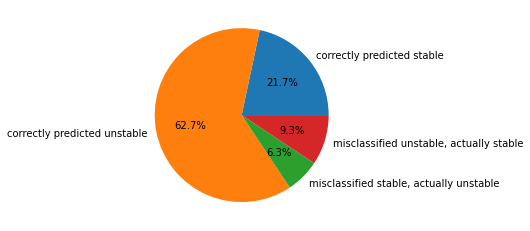

In [105]:
labels = ["correctly predicted stable", "correctly predicted unstable", 
          "misclassified stable, actually unstable", "misclassified unstable, actually stable"]
nums = [0, 0, 0, 0]


for i in range(0,len(classes_test)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            nums[0] += 1
        else:
            nums[1] += 1
    else:
        if(classes_predict[i] == 0):
            nums[2] += 1
        else:
            nums[3] += 1
    
    
plt.figure()
plt.pie(nums, labels=labels, autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Unstable planets - probability vs instability time')

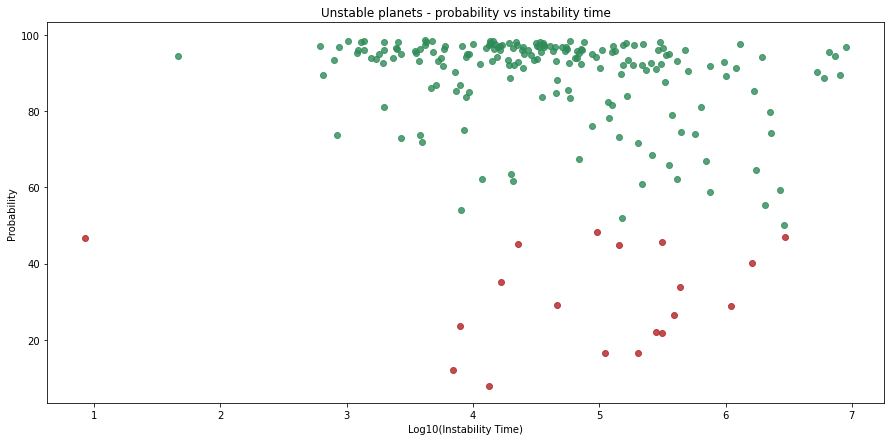

In [120]:
f=plt.figure(figsize=(15,7))

for i in range(0,len(r)):
    if (classes_test[i] == 1):
        if (classes_predict[i] == 1):
            plt.scatter(np.log10(e[i]), r[i][1] * 100, color = 'seagreen', alpha = 0.8)
        elif (classes_predict[i] == 0):
            plt.scatter(np.log10(e[i]), r[i][1] * 100, color = 'firebrick', alpha = 0.8)
   
# plt.plot(np.unique(inst), np.poly1d(np.polyfit(inst, prob, 1))(np.unique(inst)), color='black')
            

plt.ylabel('Probability')
plt.xlabel('Log10(Instability Time)')
plt.title('Unstable planets - probability vs instability time')

Text(0.5, 1.0, 'Unstable planets - probability vs instability time')

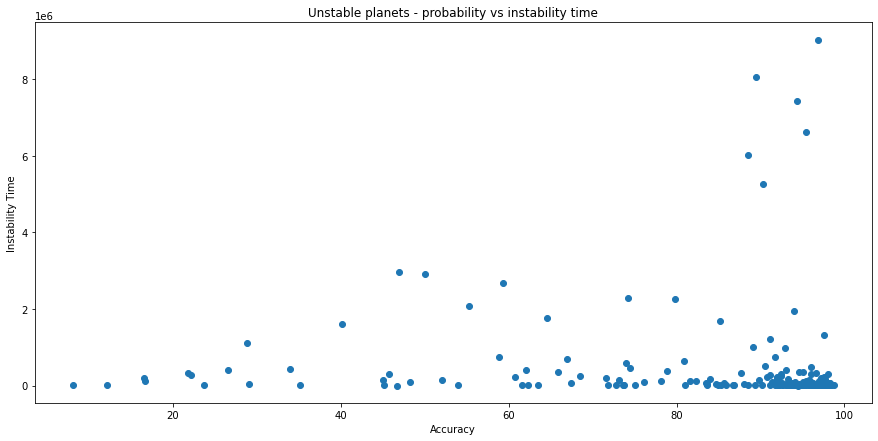

In [108]:
f=plt.figure(figsize=(15,7))

for i in range(0,len(r)):
    if (classes_test[i] == 1):
        if (classes_predict[i] == 1):
            plt.scatter(r[i][1] * 100, e[i], color = 'seagreen', alpha = 0.8)
        elif (classes_predict[i] == 0):
            plt.scatter(r[i][1] * 100, e[i], color = 'firebrick', alpha = 0.8)
            
            
plt.xlabel('Accuracy')
plt.ylabel('Instability Time')
plt.title('Unstable planets - probability vs instability time')